In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
from src.pipeline import *
%autoreload

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

In [2]:
path = 'Data/2017 Pew Research Center Science and News Survey/Segmentation_data.csv'

In [3]:
NEWS_ATTITUDES_BEHAVIORS = ['Very interested in local community news', 
                            'Very interested in sports news', 
                            'Very interested in business and finance news', 
                            'Very interested in science news',
                            'Very interested in entertainment news',
                            'Enjoy science news a lot more than other news', 
                            'I know a lot about science',
                            'Enjoy talking with others about what\'s happening in science is a major reason to follow science news',
                            'It is related to things I need to know for my job is a major reason to follow science news',
                            'Helps me make decision about every day life is a major reason to follow science news',
                            'I feel I have a social or civil obligation to stay informed is a major reason to follow science news',
                            'I am curious about what\'s happening in science is a major reason to follow science news',
                            'It is related to my activities, hobbies or interests is a major reason to follow science news',
                            'Science news is boring is a major reason to not follow science news',
                            'Science news is hard to understand is a major reason to not follow science news',
                            "I often disagree with science news is a major reason to not follow science news",
                            "Science news is less important than other topics is a major reason to not follow science news",
                            "I am too busy to keep up with science news more often is a major reason to not follow science news",
                            "I already get enough science news is a major reason to not follow science news",
                            "The sources I regulary get news from don't cover a lot of science is a major reason to not follow science news",
                            "The science topics I'm most interested in are not covered often is a major reason to not follow science news",
                            'I read, watch or listen to science news nearly every day',
                            'I read, watch or listen to science news a few times a week',
                            'I read, watch or listen to science news a few times a month',
                            'I read, watch or listen to science news less often than a few times a month',   
                            'Most interested in health & medicine', 
                            'Most interested in technology', 
                            'Most interested in energy and environment',
                            'Most interested in food and nutrition',
                            'Most interested in space and astronomy', 
                            'Most interested in evolution of human & animals',
                            'Most interested in the mind and brain',
                            'News media does a very good job in covering science',
                            'Follow science organizations, people or pages on social media',
                            'I have science-related hobbies, interests or activities outside of work']

HOBBIES_NONSCIENCE_BEHAVIORS = ['Visited zoo',
                                'Visited art museum',
                                'Visited natural history museum',
                                'Visited science/tech center/museum',
                                'Visited national, state or country park',
                                'Visited public library',
                                'Attended event with live music',
                                'Attended sport event',
                                'Attended science lecture/talk',
                                'Use social media']


DEMOGRAPHICS = ['Industry: Health Care & Social Assistance',
                'Industry: Educational Services',
                'Industry: Professional, Scientific & Technical services',
                'Industry: Retail Trade',
                'Industry: Manufacturing',
                'Industry: Other Services & Community/Non-Profit Organizations',
                'Industry: Finance and Insurance',
                'Industry: Construction',
                'Industry: Accommodation & Food Services',
                'Industry: Transportation & Warehousing',
                'Industry: Information',
                "18-24 years old", "25-34 years old", "35-44 years old", "45-54 years old", "55-64 years old", "65-74", "75+", 
                'Male', 'Female']

In [4]:
segment_vars = ['ENJOY', 'KNOWLEDGE', 'SCIOFTEN', 'TOPICS1']
data, segment_data = get_cluster_data(path, segment_vars)

In [5]:
gm3 = GaussianMixture(n_components = 3, covariance_type=  'spherical', random_state=20)
gm3.fit(segment_data)
labelsg3 = gm3.predict(segment_data)
database_datag3 = data.copy()
database_datag3['Segment'] = labelsg3
dfg_3 = get_database(database_datag3)

In [6]:
sil_score = silhouette_score(segment_data, labelsg3)
sil_score

0.4616143030979522

In [7]:
dfg_3.sort_values(2, ascending = False)

Segment,0,1,2
SEGMENT SIZE,1497.00,813.00,439.00
Get science news on a couple topics,0.00,100.00,100.00
I do not regularly get science new from sources that provide alternative perspectives to conventional science or medical research,87.84,95.69,94.31
Interested in local community news,91.98,87.33,89.75
Live in metro area,87.24,81.80,89.52
Interested in science news,90.92,45.02,87.93
"SCIENCE FICTION shows focus on entertainment more than getting the science, tech & medicine right",88.04,82.04,82.46
I own a smartphone,82.23,74.54,81.09
The way news reporters cover scientific research findings is a bigger problem than the way science researchers publish new findigns,80.49,71.71,80.87
Science news is boring is not a reason to not follow science news,86.37,58.30,79.50


In [8]:
dfg_3.loc[NEWS_ATTITUDES_BEHAVIORS].sort_values(2, ascending = False)

Segment,0,1,2
I am curious about what's happening in science is a major reason to follow science news,61.32,12.55,49.20
"I read, watch or listen to science news a few times a month",32.06,24.85,43.28
Very interested in local community news,49.97,35.92,41.91
"I read, watch or listen to science news a few times a week",39.41,0.12,41.69
Most interested in health & medicine,28.12,33.58,27.56
Very interested in science news,42.95,2.21,25.51
"I have science-related hobbies, interests or activities outside of work",28.26,4.43,23.23
"Follow science organizations, people or pages on social media",23.38,7.87,22.78
Most interested in food and nutrition,10.35,23.00,20.27
Very interested in business and finance news,26.32,11.19,20.27


### Segment Sizes

In [9]:
seg0_size = len(labelsg3[labelsg3==0])/len(segment_data)
seg1_size = len(labelsg3[labelsg3==1])/len(segment_data)
seg2_size = len(labelsg3[labelsg3==2])/len(segment_data)

print('Size of Segment 0: {}'.format(seg0_size))
print('Size of Segment 1: {}'.format(seg1_size))
print('Size of Segment 2: {}'.format(seg2_size))

Size of Segment 0: 0.5445616587850127
Size of Segment 1: 0.29574390687522734
Size of Segment 2: 0.1596944343397599


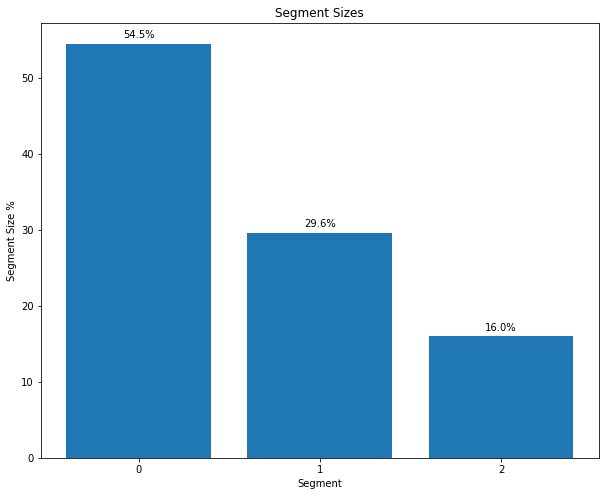

In [10]:
fig, ax = plt.subplots(figsize = (10,8))
segments = (0, 1, 2)
sizes = (dfg_3.loc['SEGMENT SIZE']/len(segment_data))*100
ax.bar(segments, height = sizes)
ax.set_title('Segment Sizes')
ax.set_xlabel('Segment')
ax.set_ylabel('Segment Size %')
ax.set_xticks(ticks = (0.0, 1.0, 2.0))
ax.set_xticklabels(('0', '1', '2'))

rects = ax.patches
# Make some labels
labels = ["{:2.1f}%".format(size) for size in sizes]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + .5, label,
            ha='center', va='bottom')

### Segmentation Variables

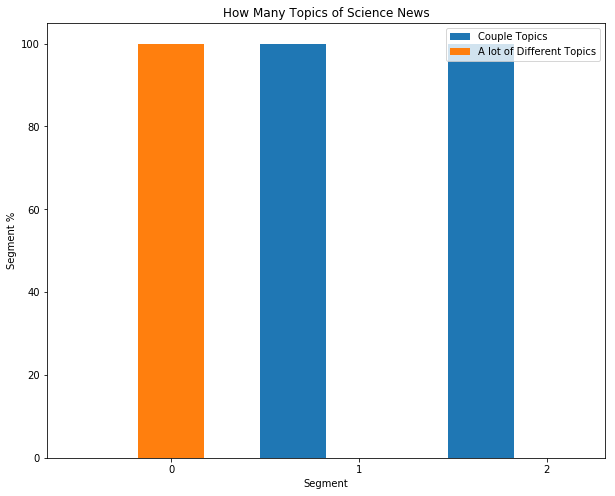

In [11]:
segments = np.asarray(segments)
a = dfg_3.loc['Get science news on a couple topics']
b = dfg_3.loc['Get science news on a lot of different topics']

bar_width = .35
fig, ax = plt.subplots(figsize = (10,8))
ax.bar(segments,  a,  bar_width, label = 'Couple Topics')
ax.bar(segments + bar_width, b, bar_width, label = 'A lot of Different Topics')
                   
ax.set_title('How Many Topics of Science News')
ax.set_xlabel('Segment')
ax.set_ylabel('Segment %')
ax.set_xticks(ticks = segments+2*bar_width/2)
ax.set_xticklabels(('0', '1', '2'))
ax.legend(loc = 'upper right')

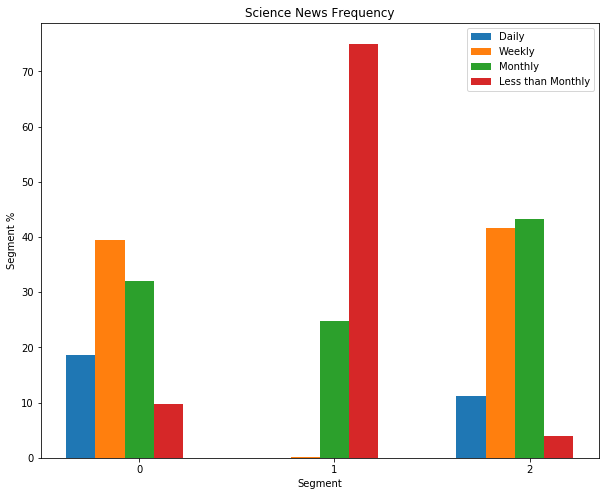

In [12]:
segments = np.asarray(segments)
a = dfg_3.loc['I read, watch or listen to science news nearly every day']
b = dfg_3.loc['I read, watch or listen to science news a few times a week']
c = dfg_3.loc['I read, watch or listen to science news a few times a month']
d = dfg_3.loc['I read, watch or listen to science news less often than a few times a month']

bar_width = .15
fig, ax = plt.subplots(figsize = (10,8))
ax.bar(segments,  a,  bar_width, label = 'Daily')
ax.bar(segments + bar_width, b, bar_width, label = 'Weekly')
ax.bar(segments + 2*bar_width, c, bar_width, label = 'Monthly')
ax.bar(segments + 3*bar_width, d, bar_width, label = 'Less than Monthly')

ax.set_title('Science News Frequency')
ax.set_xlabel('Segment')
ax.set_ylabel('Segment %')
ax.set_xticks(ticks = segments+4*bar_width/2)
ax.set_xticklabels(('0', '1', '2'))
ax.legend(loc = 'upper right')

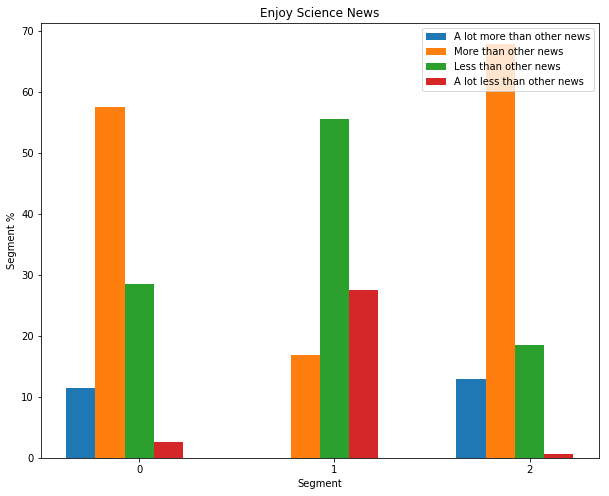

In [13]:
segments = np.asarray(segments)
a = dfg_3.loc['Enjoy science news a lot more than other news']
b = dfg_3.loc['Enjoy science news more than other news']
c = dfg_3.loc['Enjoy science news less than other news']
d = dfg_3.loc['Enjoy science news a lot less than other news']

bar_width = .15
fig, ax = plt.subplots(figsize = (10,8))
ax.bar(segments,  a,  bar_width, label = 'A lot more than other news')
ax.bar(segments + bar_width, b, bar_width, label = 'More than other news')
ax.bar(segments + 2*bar_width, c, bar_width, label = 'Less than other news')
ax.bar(segments + 3*bar_width, d, bar_width, label = 'A lot less than other news')

ax.set_title('Enjoy Science News')
ax.set_xlabel('Segment')
ax.set_ylabel('Segment %')
ax.set_xticks(ticks = segments+4*bar_width/2)
ax.set_xticklabels(('0', '1', '2'))
ax.legend(loc = 'upper right')

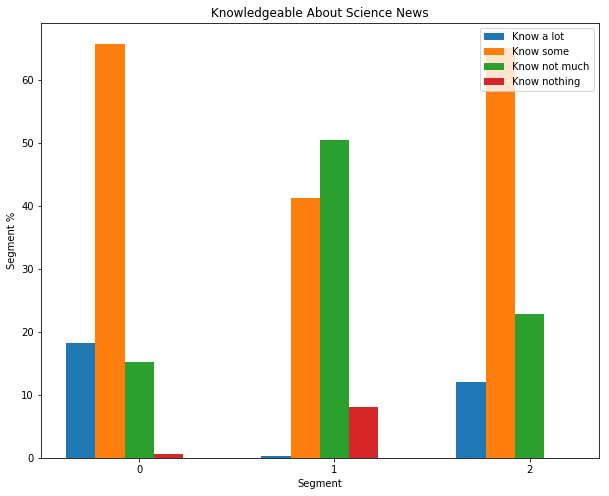

In [14]:
segments = np.asarray(segments)
a = dfg_3.loc['I know a lot about science']
b = dfg_3.loc['I know some about science']
c = dfg_3.loc['I know not much about science']
d = dfg_3.loc['I know nothing at all about science']

bar_width = .15
fig, ax = plt.subplots(figsize = (10,8))
ax.bar(segments,  a,  bar_width, label = 'Know a lot')
ax.bar(segments + bar_width, b, bar_width, label = 'Know some')
ax.bar(segments + 2*bar_width, c, bar_width, label = 'Know not much')
ax.bar(segments + 3*bar_width, d, bar_width, label = 'Know nothing')

ax.set_title('Knowledgeable About Science News')
ax.set_xlabel('Segment')
ax.set_ylabel('Segment %')
ax.set_xticks(ticks = segments+4*bar_width/2)
ax.set_xticklabels(('0', '1', '2'))
ax.legend(loc = 'upper right')

### Profiling Variables

#### Demographics

Rectangle(xy=(-0.175, 0), width=0.35, height=57.78, angle=0)
Rectangle(xy=(0.825, 0), width=0.35, height=39.73, angle=0)
Rectangle(xy=(1.825, 0), width=0.35, height=50.34, angle=0)


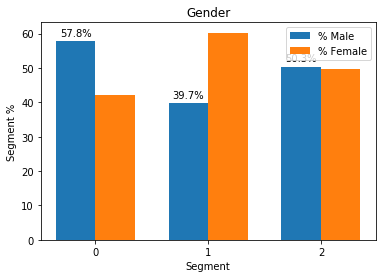

In [15]:
segments = np.asarray(segments)
per_male = dfg_3.loc['Male']
per_female = dfg_3.loc['Female']
bar_width = .35
fig, ax = plt.subplots()
ax.bar(segments,  per_male,  bar_width, label = '% Male')
ax.bar(segments + bar_width, per_female, bar_width, label = '% Female')

rects = ax.patches
# Make some labels
labels_m = ["{:2.1f}%".format(male) for male in per_male]
labels_f = ["{:2.1f}%".format(male) for male in per_male]

for rect, label in zip(rects, labels_m):
    print(rect)
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 1, label,
            ha='center', va='bottom')

ax.set_title('Gender')
ax.set_xlabel('Segment')
ax.set_ylabel('Segment %')
ax.set_xticks(ticks = segments+bar_width/2)
ax.set_xticklabels(('0', '1', '2'))
ax.legend()


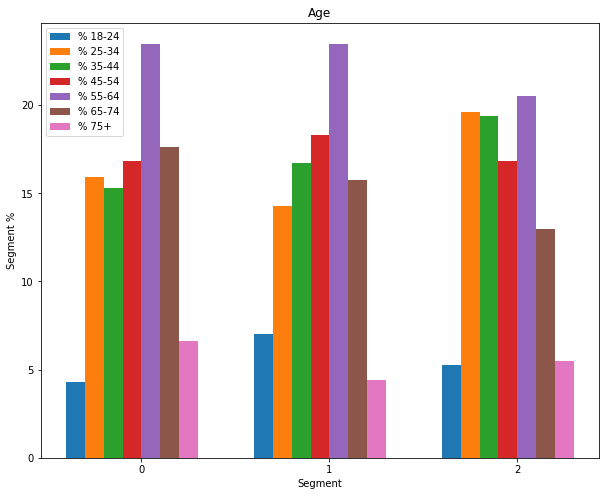

In [16]:
segments = np.asarray(segments)
per_18_24 = dfg_3.loc['18-24 years old']
per_25_34 = dfg_3.loc['25-34 years old']
per_35_44 = dfg_3.loc['35-44 years old']
per_45_54 = dfg_3.loc['45-54 years old']
per_55_64 = dfg_3.loc['55-64 years old']
per_65_74 = dfg_3.loc['65-74']
per_75 = dfg_3.loc['75+']

bar_width = .1
fig, ax = plt.subplots(figsize = (10,8))
ax.bar(segments,  per_18_24,  bar_width, label = '% 18-24')
ax.bar(segments + bar_width, per_25_34, bar_width, label = '% 25-34')
ax.bar(segments + 2*bar_width, per_35_44, bar_width, label = '% 35-44')
ax.bar(segments + 3*bar_width, per_45_54, bar_width, label = '% 45-54')
ax.bar(segments + 4*bar_width, per_55_64, bar_width, label = '% 55-64')
ax.bar(segments + 5*bar_width, per_65_74, bar_width, label = '% 65-74')
ax.bar(segments + 6*bar_width, per_75, bar_width, label = '% 75+')
       
    
ax.set_title('Age')
ax.set_xlabel('Segment')
ax.set_ylabel('Segment %')
ax.set_xticks(ticks = segments+7*bar_width/2)
ax.set_xticklabels(('0', '1', '2'))
ax.legend()

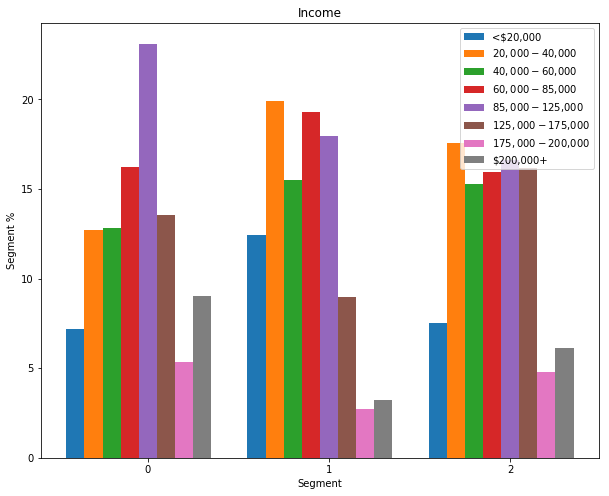

In [17]:
segments = np.asarray(segments)
a = dfg_3.loc['<$20,000']
b = dfg_3.loc['$20,000 - $40,000']
c = dfg_3.loc['$40,000 - $60,000']
d = dfg_3.loc['$60,000 - $85,000']
e = dfg_3.loc['$85,000 - $125,000']
f = dfg_3.loc['$125,000 - $175,000']
g = dfg_3.loc['$175,000 - $200,000']
h = dfg_3.loc['$200,000+']

bar_width = .1
fig, ax = plt.subplots(figsize = (10,8))
ax.bar(segments,  a,  bar_width, label = '<$20,000')
ax.bar(segments + bar_width, b, bar_width, label = '$20,000 - $40,000')
ax.bar(segments + 2*bar_width, c, bar_width, label = '$40,000 - $60,000')
ax.bar(segments + 3*bar_width, d, bar_width, label = '$60,000 - $85,000')
ax.bar(segments + 4*bar_width, e, bar_width, label = '$85,000 - $125,000')
ax.bar(segments + 5*bar_width, f, bar_width, label = '$125,000 - $175,000')
ax.bar(segments + 6*bar_width, g, bar_width, label = '$175,000 - $200,000')
ax.bar(segments + 7*bar_width, h, bar_width, label = '$200,000+')
       
                   
ax.set_title('Income')
ax.set_xlabel('Segment')
ax.set_ylabel('Segment %')
ax.set_xticks(ticks = segments+8*bar_width/2)
ax.set_xticklabels(('0', '1', '2'))
ax.legend(loc = 'upper right')

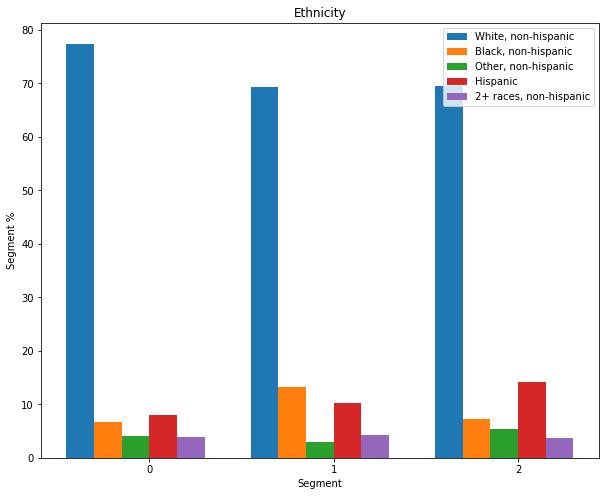

In [18]:
segments = np.asarray(segments)
a = dfg_3.loc['White, non-hispanic']
b = dfg_3.loc['Black, non-hispanic']
c = dfg_3.loc['Other, non-hispanic']
d = dfg_3.loc['Hispanic']
e = dfg_3.loc['2+ races, non-hispanic']


bar_width = .15
fig, ax = plt.subplots(figsize = (10,8))
ax.bar(segments,  a,  bar_width, label = 'White, non-hispanic')
ax.bar(segments + bar_width, b, bar_width, label = 'Black, non-hispanic')
ax.bar(segments + 2*bar_width, c, bar_width, label = 'Other, non-hispanic')
ax.bar(segments + 3*bar_width, d, bar_width, label = 'Hispanic')
ax.bar(segments + 4*bar_width, e, bar_width, label = '2+ races, non-hispanic')

                   
ax.set_title('Ethnicity')
ax.set_xlabel('Segment')
ax.set_ylabel('Segment %')
ax.set_xticks(ticks = segments+5*bar_width/2)
ax.set_xticklabels(('0', '1', '2'))
ax.legend(loc = 'upper right')

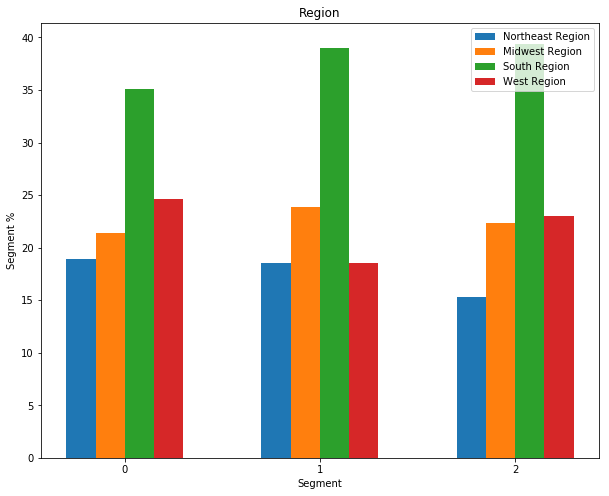

In [19]:
segments = np.asarray(segments)
a = dfg_3.loc['Northeast Region']
b = dfg_3.loc['Midwest Region']
c = dfg_3.loc['South Region']
d = dfg_3.loc['West Region']

bar_width = .15
fig, ax = plt.subplots(figsize = (10,8))
ax.bar(segments,  a,  bar_width, label = 'Northeast Region')
ax.bar(segments + bar_width, b, bar_width, label = 'Midwest Region')
ax.bar(segments + 2*bar_width, c, bar_width, label = 'South Region')
ax.bar(segments + 3*bar_width, d, bar_width, label = 'West Region')
                   
ax.set_title('Region')
ax.set_xlabel('Segment')
ax.set_ylabel('Segment %')
ax.set_xticks(ticks = segments+3*bar_width/2)
ax.set_xticklabels(('0', '1', '2'))
ax.legend(loc = 'upper right')

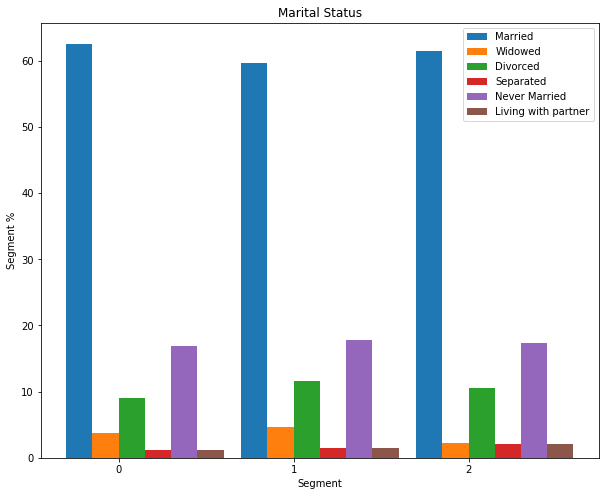

In [20]:
segments = np.asarray(segments)
a = dfg_3.loc['Married']
b = dfg_3.loc['Widowed']
c = dfg_3.loc['Divorced']
d = dfg_3.loc['Separated']
e = dfg_3.loc['Never Married']
f = dfg_3.loc['Separated']

bar_width = .15
fig, ax = plt.subplots(figsize = (10,8))
ax.bar(segments,  a,  bar_width, label = 'Married')
ax.bar(segments + bar_width, b, bar_width, label = 'Widowed')
ax.bar(segments + 2*bar_width, c, bar_width, label = 'Divorced')
ax.bar(segments + 3*bar_width, d, bar_width, label = 'Separated')
ax.bar(segments + 4*bar_width, e, bar_width, label = 'Never Married')
ax.bar(segments + 5*bar_width, f, bar_width, label = 'Living with partner')
                   
ax.set_title('Marital Status')
ax.set_xlabel('Segment')
ax.set_ylabel('Segment %')
ax.set_xticks(ticks = segments+3*bar_width/2)
ax.set_xticklabels(('0', '1', '2'))
ax.legend(loc = 'upper right')

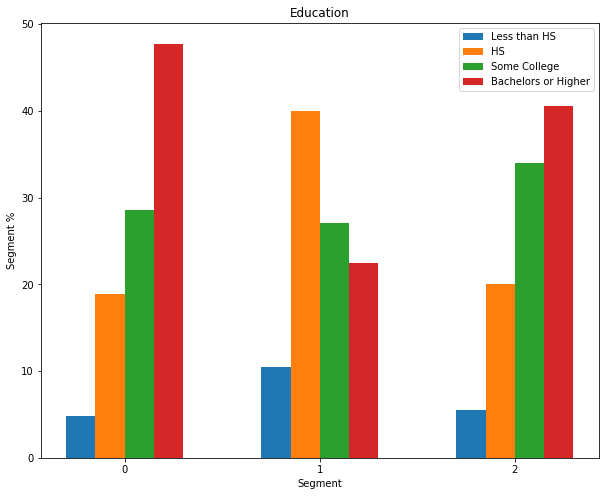

In [21]:
segments = np.asarray(segments)
a = dfg_3.loc['Completed less than HS education']
b = dfg_3.loc['Completed HS education']
c = dfg_3.loc['Completed some college education']
d = dfg_3.loc['Completed Bachelors degree or higher']

bar_width = .15
fig, ax = plt.subplots(figsize = (10,8))
ax.bar(segments,  a,  bar_width, label = 'Less than HS')
ax.bar(segments + bar_width, b, bar_width, label = 'HS')
ax.bar(segments + 2*bar_width, c, bar_width, label = 'Some College')
ax.bar(segments + 3*bar_width, d, bar_width, label = 'Bachelors or Higher')
                   
ax.set_title('Education')
ax.set_xlabel('Segment')
ax.set_ylabel('Segment %')
ax.set_xticks(ticks = segments+3*bar_width/2)
ax.set_xticklabels(('0', '1', '2'))
ax.legend(loc = 'upper right')

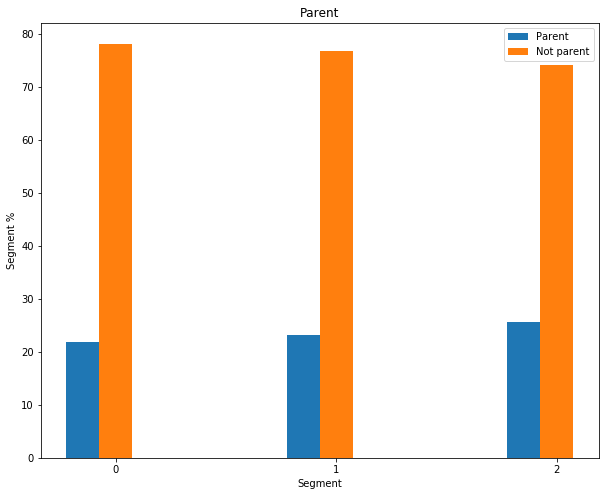

In [22]:
segments = np.asarray(segments)
a = dfg_3.loc['I am the parent of a 0-17 year old']
b = dfg_3.loc['I am not the parent of a 0-17 year old']

bar_width = .15
fig, ax = plt.subplots(figsize = (10,8))
ax.bar(segments,  a,  bar_width, label = 'Parent')
ax.bar(segments + bar_width, b, bar_width, label = 'Not parent')
          
ax.set_title('Parent')
ax.set_xlabel('Segment')
ax.set_ylabel('Segment %')
ax.set_xticks(ticks = segments+2*bar_width/2)
ax.set_xticklabels(('0', '1', '2'))
ax.legend(loc = 'upper right')

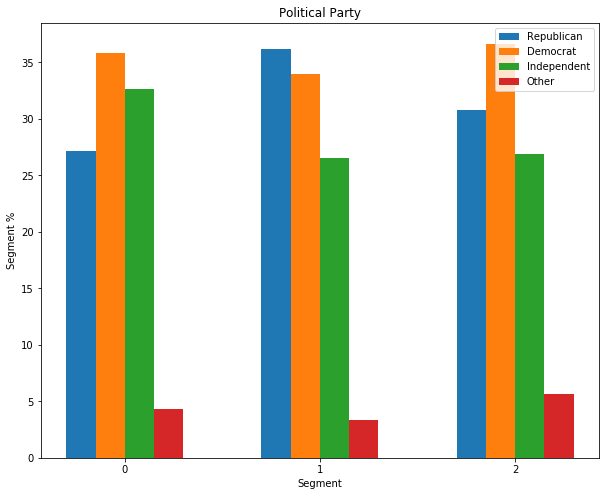

In [23]:
segments = np.asarray(segments)
a = dfg_3.loc['I consider myself a Republican']
b = dfg_3.loc['I consider myself a Democrat']
c = dfg_3.loc['I consider myself an Independent']
d = dfg_3.loc['I consider myself a different party']

bar_width = .15
fig, ax = plt.subplots(figsize = (10,8))
ax.bar(segments,  a,  bar_width, label = 'Republican')
ax.bar(segments + bar_width, b, bar_width, label = 'Democrat')
ax.bar(segments + 2*bar_width, c, bar_width, label = 'Independent')
ax.bar(segments + 3*bar_width, d, bar_width, label = 'Other')
                   
ax.set_title('Political Party')
ax.set_xlabel('Segment')
ax.set_ylabel('Segment %')
ax.set_xticks(ticks = segments+3*bar_width/2)
ax.set_xticklabels(('0', '1', '2'))
ax.legend(loc = 'upper right')

#### Science News Behaviors

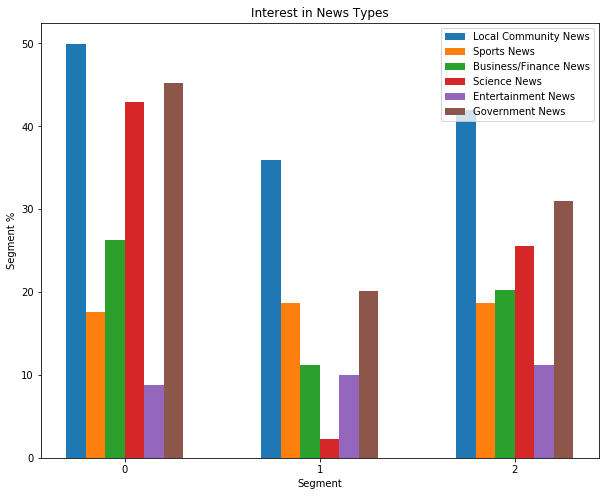

In [24]:
segments = np.asarray(segments)
a = dfg_3.loc['Very interested in local community news']
b = dfg_3.loc['Very interested in sports news']
c = dfg_3.loc['Very interested in business and finance news']
d = dfg_3.loc['Very interested in science news']
e = dfg_3.loc['Very interested in entertainment news']
f = dfg_3.loc['Very interested in government and politics news']

bar_width = .1
fig, ax = plt.subplots(figsize = (10,8))
ax.bar(segments,  a,  bar_width, label = 'Local Community News')
ax.bar(segments + bar_width, b, bar_width, label = 'Sports News')
ax.bar(segments + 2*bar_width, c, bar_width, label = 'Business/Finance News')
ax.bar(segments + 3*bar_width, d, bar_width, label = 'Science News')
ax.bar(segments + 4*bar_width, e, bar_width, label = 'Entertainment News')
ax.bar(segments + 5*bar_width, f, bar_width, label = 'Government News')


ax.set_title('Interest in News Types')
ax.set_xlabel('Segment')
ax.set_ylabel('Segment %')
ax.set_xticks(ticks = segments+5*bar_width/2)
ax.set_xticklabels(('0', '1', '2'))
ax.legend(loc = 'upper right')

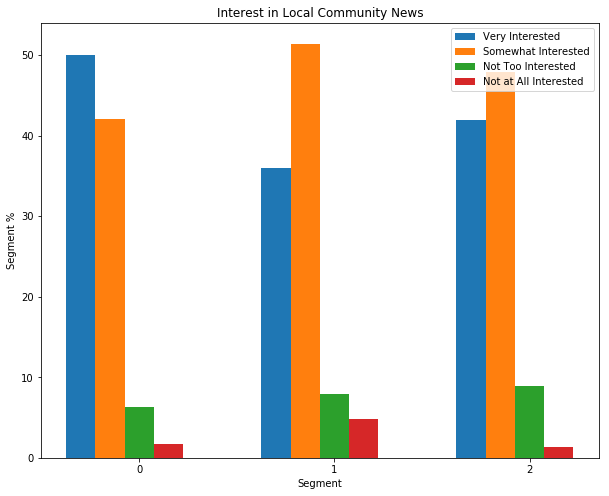

In [25]:
segments = np.asarray(segments)
a = dfg_3.loc['Very interested in local community news']
b = dfg_3.loc['Somewhat interested in local community news']
c = dfg_3.loc['Not too interested in local community news']
d = dfg_3.loc['Not at all interested in local community news']


bar_width = .15
fig, ax = plt.subplots(figsize = (10,8))
ax.bar(segments,  a,  bar_width, label = 'Very Interested')
ax.bar(segments + bar_width, b, bar_width, label = 'Somewhat Interested')
ax.bar(segments + 2*bar_width, c, bar_width, label = 'Not Too Interested')
ax.bar(segments + 3*bar_width, d, bar_width, label = 'Not at All Interested')
                   
ax.set_title('Interest in Local Community News')
ax.set_xlabel('Segment')
ax.set_ylabel('Segment %')
ax.set_xticks(ticks = segments+4*bar_width/2)
ax.set_xticklabels(('0', '1', '2'))
ax.legend(loc = 'upper right')

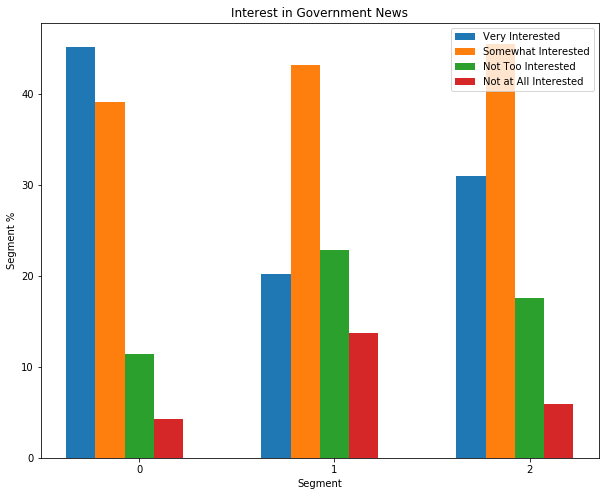

In [26]:
segments = np.asarray(segments)
a = dfg_3.loc['Very interested in government and politics news']
b = dfg_3.loc['Somewhat interested in government and politics news']
c = dfg_3.loc['Not too interested in government and politics news']
d = dfg_3.loc['Not at all interested in government and politics news']


bar_width = .15
fig, ax = plt.subplots(figsize = (10,8))
ax.bar(segments,  a,  bar_width, label = 'Very Interested')
ax.bar(segments + bar_width, b, bar_width, label = 'Somewhat Interested')
ax.bar(segments + 2*bar_width, c, bar_width, label = 'Not Too Interested')
ax.bar(segments + 3*bar_width, d, bar_width, label = 'Not at All Interested')
                   
ax.set_title('Interest in Government News')
ax.set_xlabel('Segment')
ax.set_ylabel('Segment %')
ax.set_xticks(ticks = segments+4*bar_width/2)
ax.set_xticklabels(('0', '1', '2'))
ax.legend(loc = 'upper right')

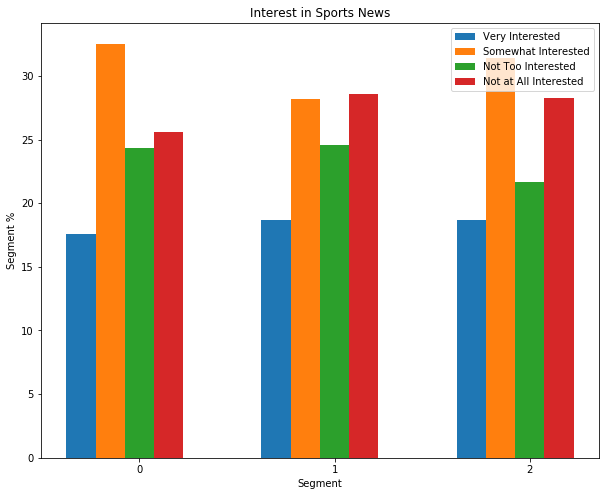

In [27]:
segments = np.asarray(segments)
a = dfg_3.loc['Very interested in sports news']
b = dfg_3.loc['Somewhat interested in sports news']
c = dfg_3.loc['Not too interested in sports news']
d = dfg_3.loc['Not at all interested in sports news']


bar_width = .15
fig, ax = plt.subplots(figsize = (10,8))
ax.bar(segments,  a,  bar_width, label = 'Very Interested')
ax.bar(segments + bar_width, b, bar_width, label = 'Somewhat Interested')
ax.bar(segments + 2*bar_width, c, bar_width, label = 'Not Too Interested')
ax.bar(segments + 3*bar_width, d, bar_width, label = 'Not at All Interested')
                   
ax.set_title('Interest in Sports News')
ax.set_xlabel('Segment')
ax.set_ylabel('Segment %')
ax.set_xticks(ticks = segments+4*bar_width/2)
ax.set_xticklabels(('0', '1', '2'))
ax.legend(loc = 'upper right')

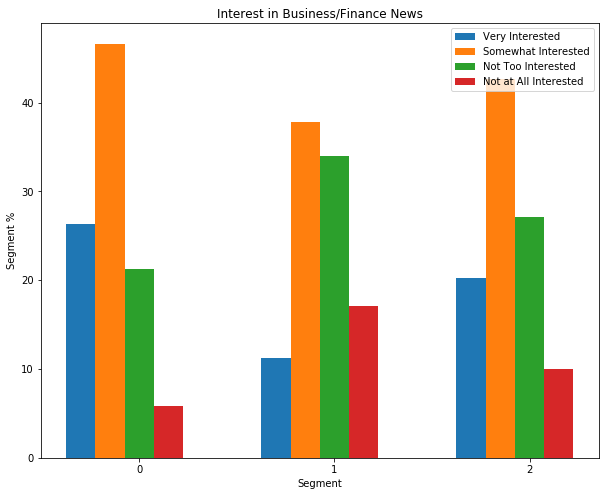

In [28]:
segments = np.asarray(segments)
a = dfg_3.loc['Very interested in business and finance news']
b = dfg_3.loc['Somewhat interested in business and finance news']
c = dfg_3.loc['Not too interested in business and finance news']
d = dfg_3.loc['Not at all interested in business and finance news']


bar_width = .15
fig, ax = plt.subplots(figsize = (10,8))
ax.bar(segments,  a,  bar_width, label = 'Very Interested')
ax.bar(segments + bar_width, b, bar_width, label = 'Somewhat Interested')
ax.bar(segments + 2*bar_width, c, bar_width, label = 'Not Too Interested')
ax.bar(segments + 3*bar_width, d, bar_width, label = 'Not at All Interested')
                   
ax.set_title('Interest in Business/Finance News')
ax.set_xlabel('Segment')
ax.set_ylabel('Segment %')
ax.set_xticks(ticks = segments+4*bar_width/2)
ax.set_xticklabels(('0', '1', '2'))
ax.legend(loc = 'upper right')

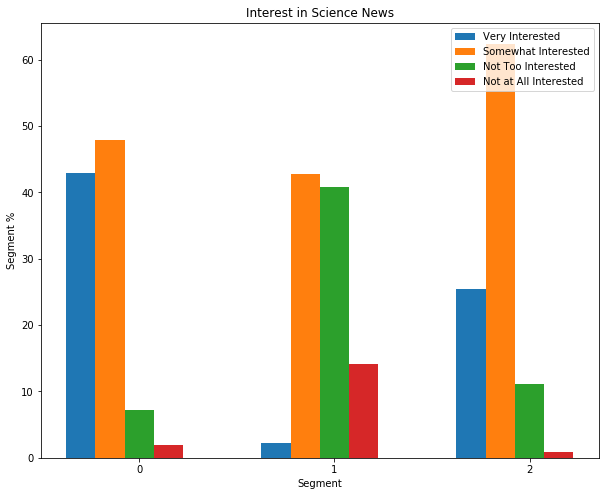

In [29]:
segments = np.asarray(segments)
a = dfg_3.loc['Very interested in science news']
b = dfg_3.loc['Somewhat interested in science news']
c = dfg_3.loc['Not too interested in science news']
d = dfg_3.loc['Not at all interested in science news']


bar_width = .15
fig, ax = plt.subplots(figsize = (10,8))
ax.bar(segments,  a,  bar_width, label = 'Very Interested')
ax.bar(segments + bar_width, b, bar_width, label = 'Somewhat Interested')
ax.bar(segments + 2*bar_width, c, bar_width, label = 'Not Too Interested')
ax.bar(segments + 3*bar_width, d, bar_width, label = 'Not at All Interested')
                   
ax.set_title('Interest in Science News')
ax.set_xlabel('Segment')
ax.set_ylabel('Segment %')
ax.set_xticks(ticks = segments+4*bar_width/2)
ax.set_xticklabels(('0', '1', '2'))
ax.legend(loc = 'upper right')

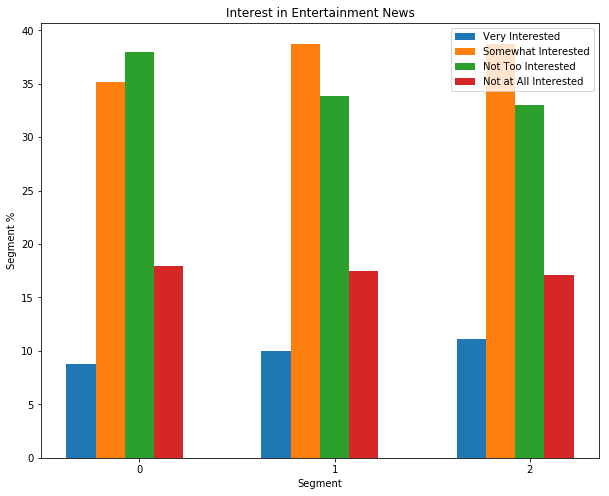

In [30]:
segments = np.asarray(segments)
a = dfg_3.loc['Very interested in entertainment news']
b = dfg_3.loc['Somewhat interested in entertainment news']
c = dfg_3.loc['Not too interested in entertainment news']
d = dfg_3.loc['Not at all interested in entertainment news']


bar_width = .15
fig, ax = plt.subplots(figsize = (10,8))
ax.bar(segments,  a,  bar_width, label = 'Very Interested')
ax.bar(segments + bar_width, b, bar_width, label = 'Somewhat Interested')
ax.bar(segments + 2*bar_width, c, bar_width, label = 'Not Too Interested')
ax.bar(segments + 3*bar_width, d, bar_width, label = 'Not at All Interested')
                   
ax.set_title('Interest in Entertainment News')
ax.set_xlabel('Segment')
ax.set_ylabel('Segment %')
ax.set_xticks(ticks = segments+4*bar_width/2)
ax.set_xticklabels(('0', '1', '2'))
ax.legend(loc = 'upper right')

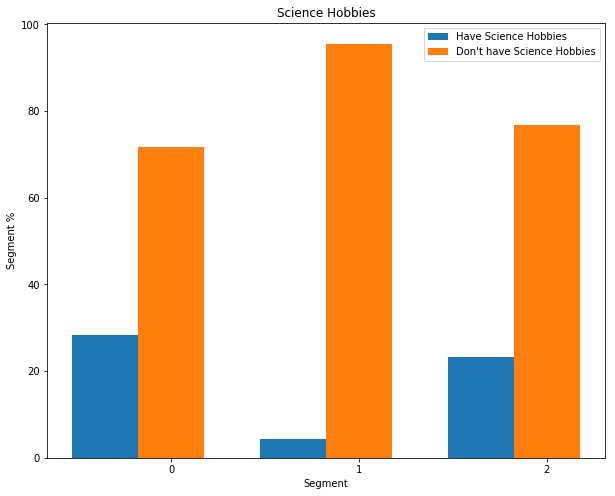

In [31]:
segments = np.asarray(segments)
a = dfg_3.loc['I have science-related hobbies, interests or activities outside of work']
b = dfg_3.loc['I do not have science-related hobbies, interests or activities outside of work']


bar_width = .35
fig, ax = plt.subplots(figsize = (10,8))
ax.bar(segments,  a,  bar_width, label = 'Have Science Hobbies')
ax.bar(segments + bar_width, b, bar_width, label = 'Don\'t have Science Hobbies')

                   
ax.set_title('Science Hobbies')
ax.set_xlabel('Segment')
ax.set_ylabel('Segment %')
ax.set_xticks(ticks = segments+2*bar_width/2)
ax.set_xticklabels(('0', '1', '2'))
ax.legend(loc = 'upper right')

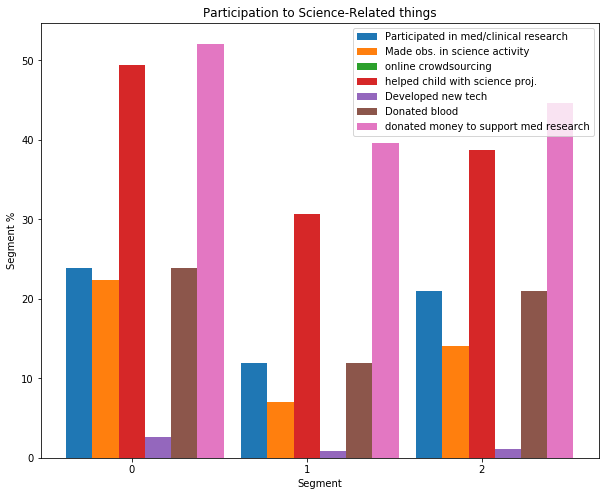

In [32]:
segments = np.asarray(segments)
a = dfg_3.loc['I have participated in a medical or clinical research study']
b = dfg_3.loc['I have made observations or collected data samples as part of a science research project']
c = dfg_3.loc['I have contributed to a science-related online crowdsourcing activity']
d = dfg_3.loc['I have helped a child with a science project whether for school or for an outside school activity']
e = dfg_3.loc['I have participated in a maker movement or hack-a-thon event to develop new technologies']
f = dfg_3.loc['I have participated in a medical or clinical research study']
g = dfg_3.loc['I have donated blood']
h = dfg_3.loc['I have donated money to support medical or science research']


bar_width = .15
fig, ax = plt.subplots(figsize = (10,8))
ax.bar(segments,  a,  bar_width, label = 'Participated in med/clinical research')
ax.bar(segments + bar_width, b, bar_width, label = 'Made obs. in science activity')
ax.bar(segments + 2*bar_width, c, bar_width, label = 'online crowdsourcing')
ax.bar(segments + 2*bar_width, d, bar_width, label = 'helped child with science proj.')
ax.bar(segments + 3*bar_width, e, bar_width, label = 'Developed new tech')
ax.bar(segments + 4*bar_width, f, bar_width, label = 'Donated blood')
ax.bar(segments + 5*bar_width, g, bar_width, label = 'donated money to support med research')
                   
ax.set_title('Participation to Science-Related things')
ax.set_xlabel('Segment')
ax.set_ylabel('Segment %')
ax.set_xticks(ticks = segments+4*bar_width/2)
ax.set_xticklabels(('0', '1', '2'))
ax.legend(loc = 'upper right')

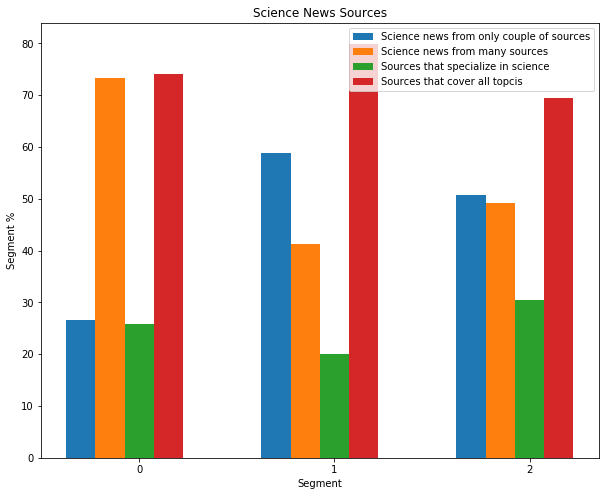

In [33]:
segments = np.asarray(segments)
a = dfg_3.loc['Get science news from a couple sources']
b = dfg_3.loc['Get science news from many different sources']
c = dfg_3.loc['Get science news from sources that specialize in science topics']
d = dfg_3.loc['Get science news sources that cover all sorts of topics']

bar_width = .15
fig, ax = plt.subplots(figsize = (10,8))
ax.bar(segments,  a,  bar_width, label = 'Science news from only couple of sources')
ax.bar(segments + bar_width, b, bar_width, label = 'Science news from many sources')
ax.bar(segments + 2*bar_width, c, bar_width, label = 'Sources that specialize in science')
ax.bar(segments + 3*bar_width, d, bar_width, label = 'Sources that cover all topcis')

ax.set_title('Science News Sources')
ax.set_xlabel('Segment')
ax.set_ylabel('Segment %')
ax.set_xticks(ticks = segments+4*bar_width/2)
ax.set_xticklabels(('0', '1', '2'))
ax.legend(loc = 'upper right')

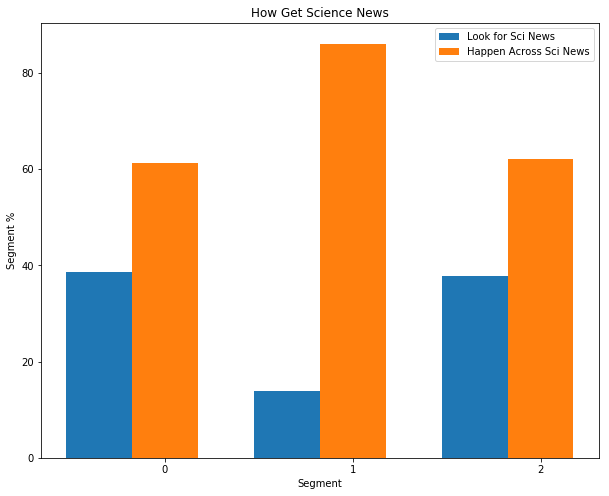

In [34]:
segments = np.asarray(segments)
a = dfg_3.loc["I mostly get science news because I'm looking for it"]
b = dfg_3.loc["I mostly get science news because I happen to come across it"]

bar_width = .35
fig, ax = plt.subplots(figsize = (10,8))
ax.bar(segments,  a,  bar_width, label = 'Look for Sci News')
ax.bar(segments + bar_width, b, bar_width, label = 'Happen Across Sci News')

ax.set_title('How Get Science News')
ax.set_xlabel('Segment')
ax.set_ylabel('Segment %')
ax.set_xticks(ticks = segments+2*bar_width/2)
ax.set_xticklabels(('0', '1', '2'))
ax.legend(loc = 'upper right')

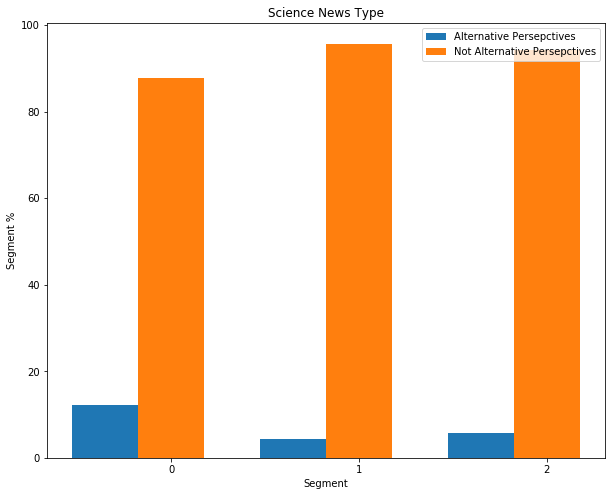

In [35]:
segments = np.asarray(segments)
a = dfg_3.loc['I regularly get science new from sources that provide alternative perspectives to conventional science or medical research']
b = dfg_3.loc['I do not regularly get science new from sources that provide alternative perspectives to conventional science or medical research']

bar_width = .35
fig, ax = plt.subplots(figsize = (10,8))
ax.bar(segments,  a,  bar_width, label = 'Alternative Persepctives')
ax.bar(segments + bar_width, b, bar_width, label = 'Not Alternative Persepctives')

ax.set_title('Science News Type')
ax.set_xlabel('Segment')
ax.set_ylabel('Segment %')
ax.set_xticks(ticks = segments+2*bar_width/2)
ax.set_xticklabels(('0', '1', '2'))
ax.legend(loc = 'upper right')

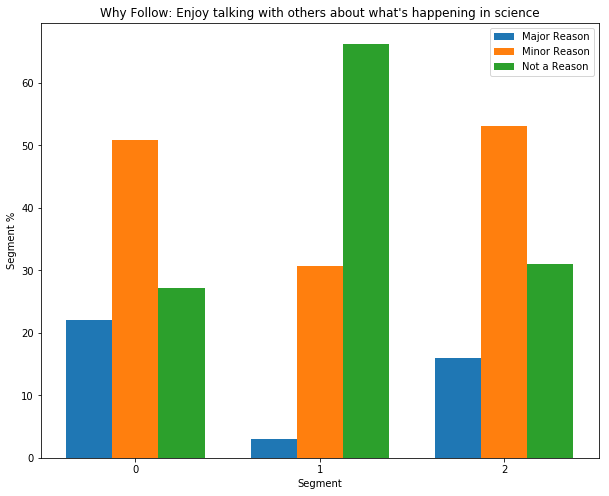

In [36]:
segments = np.asarray(segments)
a = dfg_3.loc['Enjoy talking with others about what\'s happening in science is a major reason to follow science news']
b = dfg_3.loc['Enjoy talking with others about what\'s happening in science is a minor reason to follow science news']
c = dfg_3.loc['Enjoy talking with others about what\'s happening in science is not a reason to follow science news']

bar_width = .25
fig, ax = plt.subplots(figsize = (10,8))
ax.bar(segments,  a,  bar_width, label = 'Major Reason')
ax.bar(segments + bar_width, b, bar_width, label = 'Minor Reason')
ax.bar(segments + 2*bar_width, c, bar_width, label = 'Not a Reason')

ax.set_title('Why Follow: Enjoy talking with others about what\'s happening in science')
ax.set_xlabel('Segment')
ax.set_ylabel('Segment %')
ax.set_xticks(ticks = segments+2*bar_width/2)
ax.set_xticklabels(('0', '1', '2'))
ax.legend(loc = 'upper right')

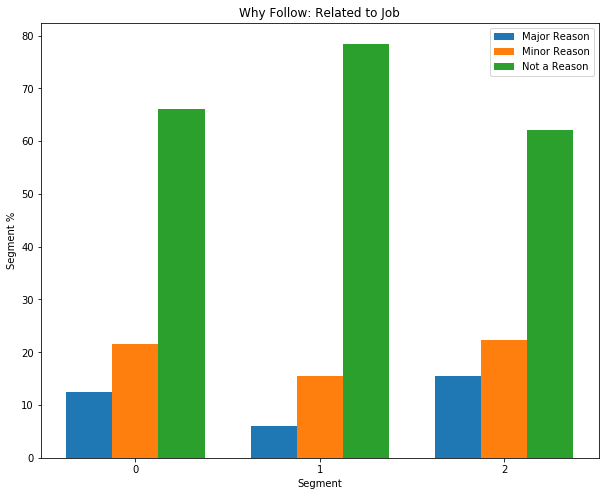

In [37]:
segments = np.asarray(segments)
a = dfg_3.loc['It is related to things I need to know for my job is a major reason to follow science news']
b = dfg_3.loc['It is related to things I need to know for my job is a minor reason to follow science news']
c = dfg_3.loc['It is related to things I need to know for my job is not a reason to follow science news']

bar_width = .25
fig, ax = plt.subplots(figsize = (10,8))
ax.bar(segments,  a,  bar_width, label = 'Major Reason')
ax.bar(segments + bar_width, b, bar_width, label = 'Minor Reason')
ax.bar(segments + 2*bar_width, c, bar_width, label = 'Not a Reason')

ax.set_title('Why Follow: Related to Job')
ax.set_xlabel('Segment')
ax.set_ylabel('Segment %')
ax.set_xticks(ticks = segments+2*bar_width/2)
ax.set_xticklabels(('0', '1', '2'))
ax.legend(loc = 'upper right')

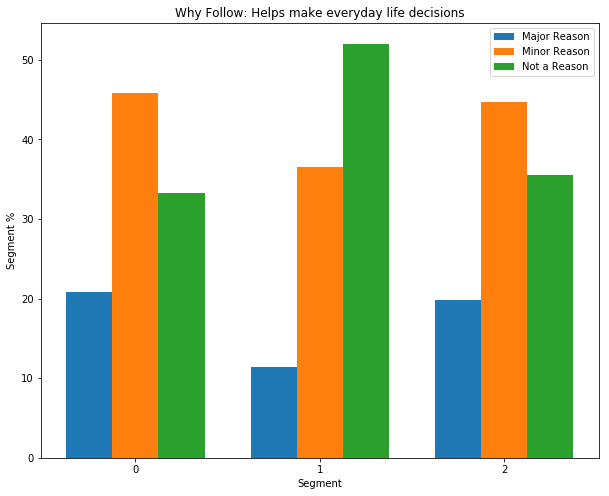

In [38]:
segments = np.asarray(segments)
a = dfg_3.loc['Helps me make decision about every day life is a major reason to follow science news']
b = dfg_3.loc['Helps me make decision about every day life is a minor reason to follow science news']
c = dfg_3.loc['Helps me make decision about every day life is not a reason to follow science news']

bar_width = .25
fig, ax = plt.subplots(figsize = (10,8))
ax.bar(segments,  a,  bar_width, label = 'Major Reason')
ax.bar(segments + bar_width, b, bar_width, label = 'Minor Reason')
ax.bar(segments + 2*bar_width, c, bar_width, label = 'Not a Reason')

ax.set_title('Why Follow: Helps make everyday life decisions')
ax.set_xlabel('Segment')
ax.set_ylabel('Segment %')
ax.set_xticks(ticks = segments+2*bar_width/2)
ax.set_xticklabels(('0', '1', '2'))
ax.legend(loc = 'upper right')

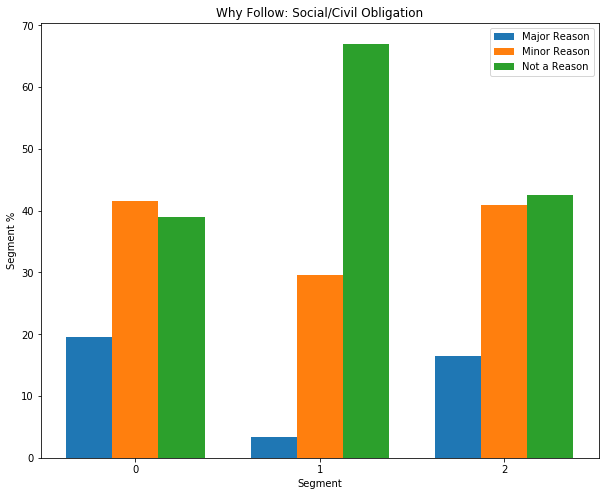

In [39]:
segments = np.asarray(segments)
a = dfg_3.loc['I feel I have a social or civil obligation to stay informed is a major reason to follow science news']
b = dfg_3.loc['I feel I have a social or civil obligation to stay informed is a minor reason to follow science news']
c = dfg_3.loc['I feel I have a social or civil obligation to stay informed is not a reason to follow science news']

bar_width = .25
fig, ax = plt.subplots(figsize = (10,8))
ax.bar(segments,  a,  bar_width, label = 'Major Reason')
ax.bar(segments + bar_width, b, bar_width, label = 'Minor Reason')
ax.bar(segments + 2*bar_width, c, bar_width, label = 'Not a Reason')

ax.set_title('Why Follow: Social/Civil Obligation')
ax.set_xlabel('Segment')
ax.set_ylabel('Segment %')
ax.set_xticks(ticks = segments+2*bar_width/2)
ax.set_xticklabels(('0', '1', '2'))
ax.legend(loc = 'upper right')

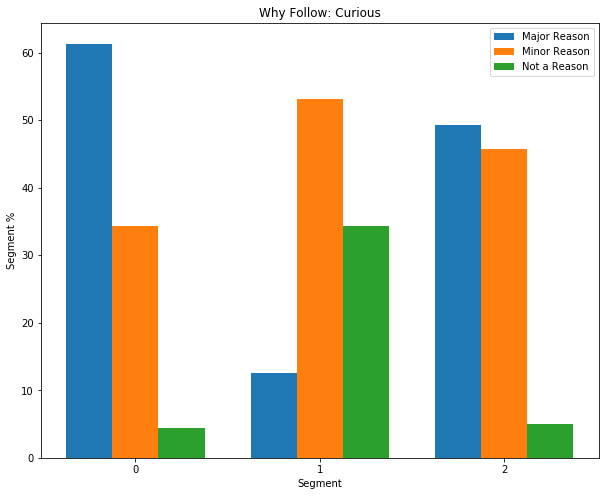

In [40]:
segments = np.asarray(segments)
a = dfg_3.loc['I am curious about what\'s happening in science is a major reason to follow science news']
b = dfg_3.loc['I am curious about what\'s happening in science is a minor reason to follow science news']
c = dfg_3.loc['I am curious about what\'s happening in science is not a reason to follow science news']

bar_width = .25
fig, ax = plt.subplots(figsize = (10,8))
ax.bar(segments,  a,  bar_width, label = 'Major Reason')
ax.bar(segments + bar_width, b, bar_width, label = 'Minor Reason')
ax.bar(segments + 2*bar_width, c, bar_width, label = 'Not a Reason')

ax.set_title('Why Follow: Curious')
ax.set_xlabel('Segment')
ax.set_ylabel('Segment %')
ax.set_xticks(ticks = segments+2*bar_width/2)
ax.set_xticklabels(('0', '1', '2'))
ax.legend(loc = 'upper right')

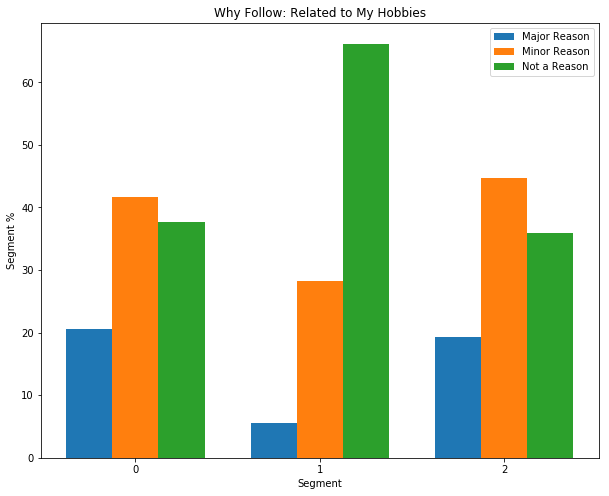

In [41]:
segments = np.asarray(segments)
a = dfg_3.loc['It is related to my activities, hobbies or interests is a major reason to follow science news']
b = dfg_3.loc['It is related to my activities, hobbies or interests is a minor reason to follow science news']
c = dfg_3.loc['It is related to my activities, hobbies or interests is not a reason to follow science news']

bar_width = .25
fig, ax = plt.subplots(figsize = (10,8))
ax.bar(segments,  a,  bar_width, label = 'Major Reason')
ax.bar(segments + bar_width, b, bar_width, label = 'Minor Reason')
ax.bar(segments + 2*bar_width, c, bar_width, label = 'Not a Reason')

ax.set_title('Why Follow: Related to My Hobbies')
ax.set_xlabel('Segment')
ax.set_ylabel('Segment %')
ax.set_xticks(ticks = segments+2*bar_width/2)
ax.set_xticklabels(('0', '1', '2'))
ax.legend(loc = 'upper right')

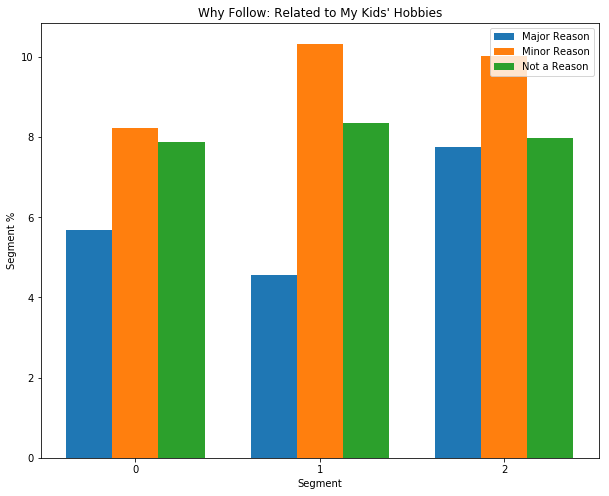

In [42]:
segments = np.asarray(segments)
a = dfg_3.loc['It is related to my children\'s activities, interests or education is a major reason to follow science news']
b = dfg_3.loc['It is related to my children\'s activities, interests or education is a minor reason to follow science news']
c = dfg_3.loc['It is related to my children\'s activities, interests or education is not a reason to follow science news']

bar_width = .25
fig, ax = plt.subplots(figsize = (10,8))
ax.bar(segments,  a,  bar_width, label = 'Major Reason')
ax.bar(segments + bar_width, b, bar_width, label = 'Minor Reason')
ax.bar(segments + 2*bar_width, c, bar_width, label = 'Not a Reason')

ax.set_title('Why Follow: Related to My Kids\' Hobbies')
ax.set_xlabel('Segment')
ax.set_ylabel('Segment %')
ax.set_xticks(ticks = segments+2*bar_width/2)
ax.set_xticklabels(('0', '1', '2'))
ax.legend(loc = 'upper right')

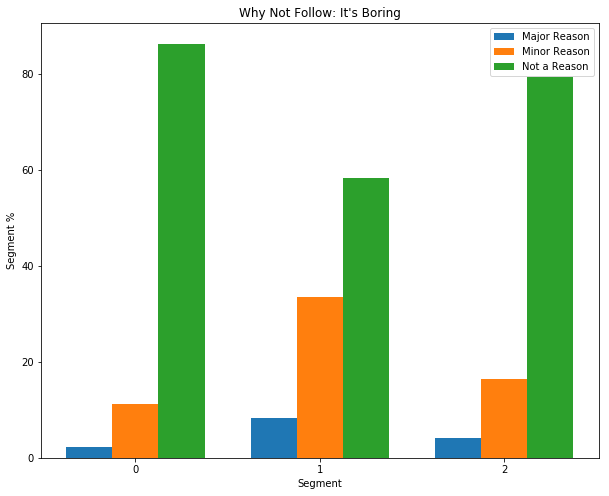

In [43]:
segments = np.asarray(segments)
a = dfg_3.loc['Science news is boring is a major reason to not follow science news']
b = dfg_3.loc['Science news is boring is a minor reason to not follow science news']
c = dfg_3.loc['Science news is boring is not a reason to not follow science news']

bar_width = .25
fig, ax = plt.subplots(figsize = (10,8))
ax.bar(segments,  a,  bar_width, label = 'Major Reason')
ax.bar(segments + bar_width, b, bar_width, label = 'Minor Reason')
ax.bar(segments + 2*bar_width, c, bar_width, label = 'Not a Reason')

ax.set_title('Why Not Follow: It\'s Boring')
ax.set_xlabel('Segment')
ax.set_ylabel('Segment %')
ax.set_xticks(ticks = segments+2*bar_width/2)
ax.set_xticklabels(('0', '1', '2'))
ax.legend(loc = 'upper right')

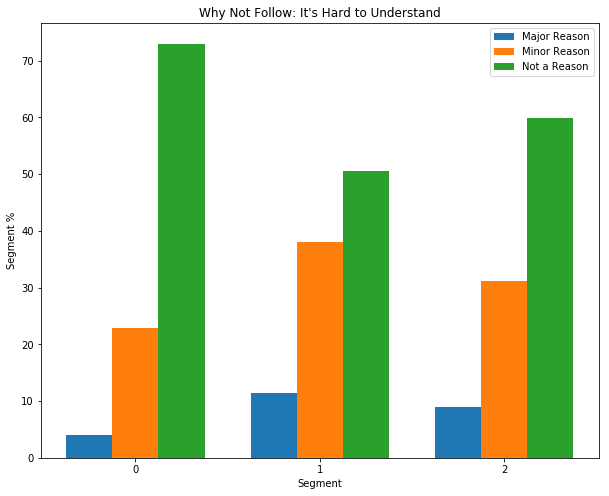

In [44]:
segments = np.asarray(segments)
a = dfg_3.loc['Science news is hard to understand is a major reason to not follow science news']
b = dfg_3.loc['Science news is hard to understand is a minor reason to not follow science news']
c = dfg_3.loc['Science news is hard to understand is not a reason to not follow science news']

bar_width = .25
fig, ax = plt.subplots(figsize = (10,8))
ax.bar(segments,  a,  bar_width, label = 'Major Reason')
ax.bar(segments + bar_width, b, bar_width, label = 'Minor Reason')
ax.bar(segments + 2*bar_width, c, bar_width, label = 'Not a Reason')

ax.set_title('Why Not Follow: It\'s Hard to Understand')
ax.set_xlabel('Segment')
ax.set_ylabel('Segment %')
ax.set_xticks(ticks = segments+2*bar_width/2)
ax.set_xticklabels(('0', '1', '2'))
ax.legend(loc = 'upper right')

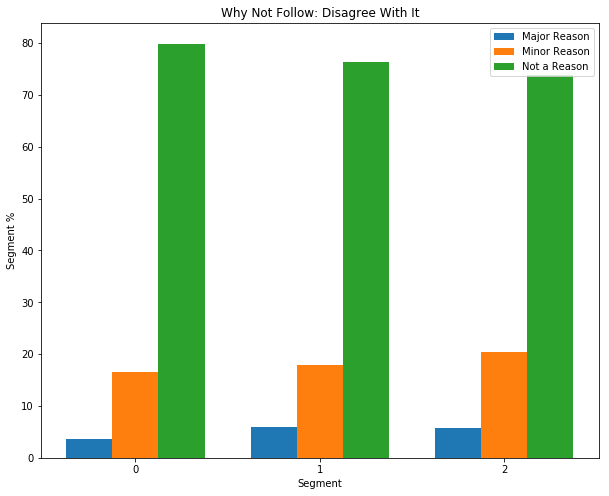

In [45]:
segments = np.asarray(segments)
a = dfg_3.loc['I often disagree with science news is a major reason to not follow science news']
b = dfg_3.loc['I often disagree with science news is a minor reason to not follow science news']
c = dfg_3.loc['I often disagree with science news is not a reason to not follow science news']

bar_width = .25
fig, ax = plt.subplots(figsize = (10,8))
ax.bar(segments,  a,  bar_width, label = 'Major Reason')
ax.bar(segments + bar_width, b, bar_width, label = 'Minor Reason')
ax.bar(segments + 2*bar_width, c, bar_width, label = 'Not a Reason')

ax.set_title('Why Not Follow: Disagree With It')
ax.set_xlabel('Segment')
ax.set_ylabel('Segment %')
ax.set_xticks(ticks = segments+2*bar_width/2)
ax.set_xticklabels(('0', '1', '2'))
ax.legend(loc = 'upper right')

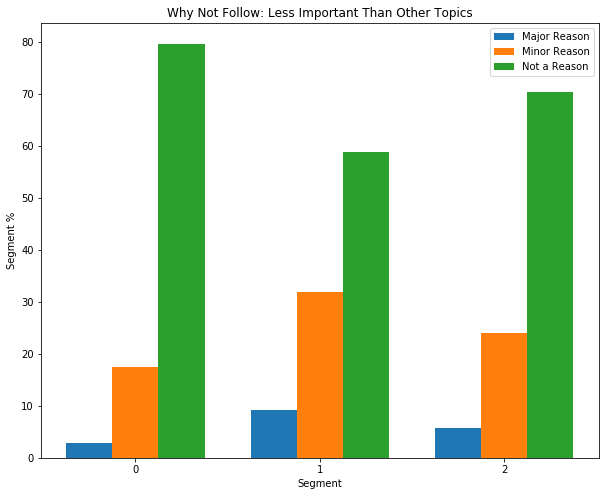

In [46]:
segments = np.asarray(segments)
a = dfg_3.loc['Science news is less important than other topics is a major reason to not follow science news']
b = dfg_3.loc['Science news is less important than other topics is a minor reason to not follow science news']
c = dfg_3.loc['Science news is less important than other topics is not a reason to not follow science news']

bar_width = .25
fig, ax = plt.subplots(figsize = (10,8))
ax.bar(segments,  a,  bar_width, label = 'Major Reason')
ax.bar(segments + bar_width, b, bar_width, label = 'Minor Reason')
ax.bar(segments + 2*bar_width, c, bar_width, label = 'Not a Reason')

ax.set_title('Why Not Follow: Less Important Than Other Topics')
ax.set_xlabel('Segment')
ax.set_ylabel('Segment %')
ax.set_xticks(ticks = segments+2*bar_width/2)
ax.set_xticklabels(('0', '1', '2'))
ax.legend(loc = 'upper right')

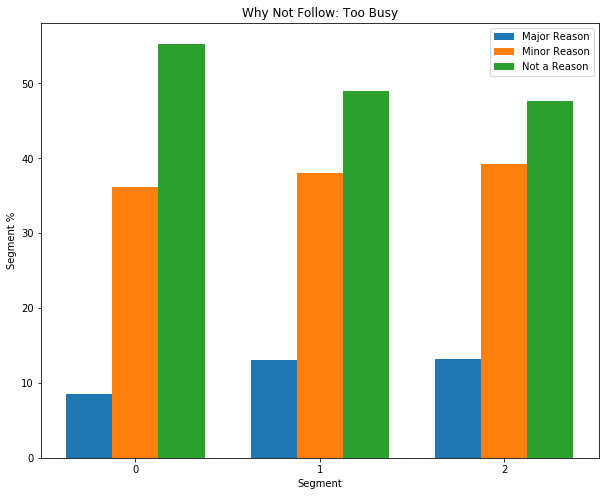

In [47]:
segments = np.asarray(segments)
a = dfg_3.loc['I am too busy to keep up with science news more often is a major reason to not follow science news']
b = dfg_3.loc['I am too busy to keep up with science news more often is a minor reason to not follow science news']
c = dfg_3.loc['I am too busy to keep up with science news more often is not a reason to not follow science news']

bar_width = .25
fig, ax = plt.subplots(figsize = (10,8))
ax.bar(segments,  a,  bar_width, label = 'Major Reason')
ax.bar(segments + bar_width, b, bar_width, label = 'Minor Reason')
ax.bar(segments + 2*bar_width, c, bar_width, label = 'Not a Reason')

ax.set_title('Why Not Follow: Too Busy')
ax.set_xlabel('Segment')
ax.set_ylabel('Segment %')
ax.set_xticks(ticks = segments+2*bar_width/2)
ax.set_xticklabels(('0', '1', '2'))
ax.legend(loc = 'upper right')

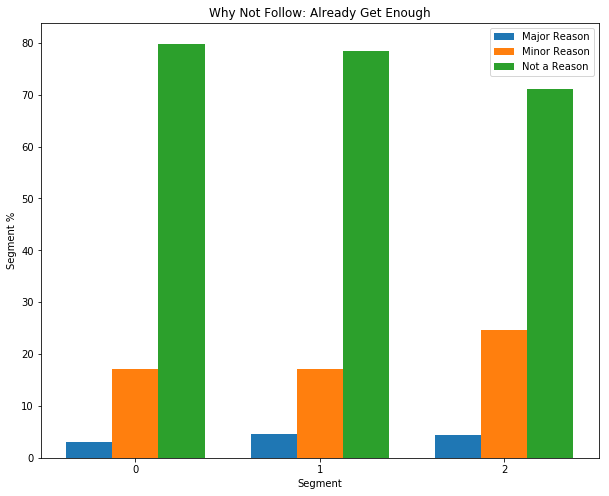

In [48]:
segments = np.asarray(segments)
a = dfg_3.loc['I already get enough science news is a major reason to not follow science news']
b = dfg_3.loc['I already get enough science news is a minor reason to not follow science news']
c = dfg_3.loc['I already get enough science news is not a reason to not follow science news']

bar_width = .25
fig, ax = plt.subplots(figsize = (10,8))
ax.bar(segments,  a,  bar_width, label = 'Major Reason')
ax.bar(segments + bar_width, b, bar_width, label = 'Minor Reason')
ax.bar(segments + 2*bar_width, c, bar_width, label = 'Not a Reason')

ax.set_title('Why Not Follow: Already Get Enough')
ax.set_xlabel('Segment')
ax.set_ylabel('Segment %')
ax.set_xticks(ticks = segments+2*bar_width/2)
ax.set_xticklabels(('0', '1', '2'))
ax.legend(loc = 'upper right')

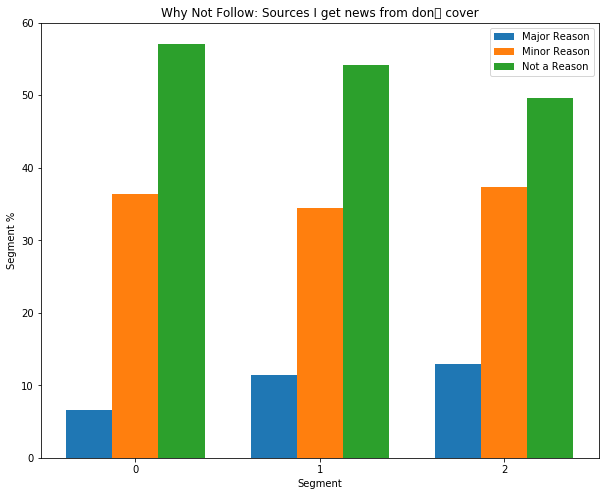

In [49]:
segments = np.asarray(segments)
a = dfg_3.loc['The sources I regulary get news from don\'t cover a lot of science is a major reason to not follow science news']
b = dfg_3.loc['The sources I regulary get news from don\'t cover a lot of science is a minor reason to not follow science news']
c = dfg_3.loc['The sources I regulary get news from don\'t cover a lot of science is not a reason to not follow science news']

bar_width = .25
fig, ax = plt.subplots(figsize = (10,8))
ax.bar(segments,  a,  bar_width, label = 'Major Reason')
ax.bar(segments + bar_width, b, bar_width, label = 'Minor Reason')
ax.bar(segments + 2*bar_width, c, bar_width, label = 'Not a Reason')

ax.set_title('Why Not Follow: Sources I get news from don\t cover')
ax.set_xlabel('Segment')
ax.set_ylabel('Segment %')
ax.set_xticks(ticks = segments+2*bar_width/2)
ax.set_xticklabels(('0', '1', '2'))
ax.legend(loc = 'upper right')

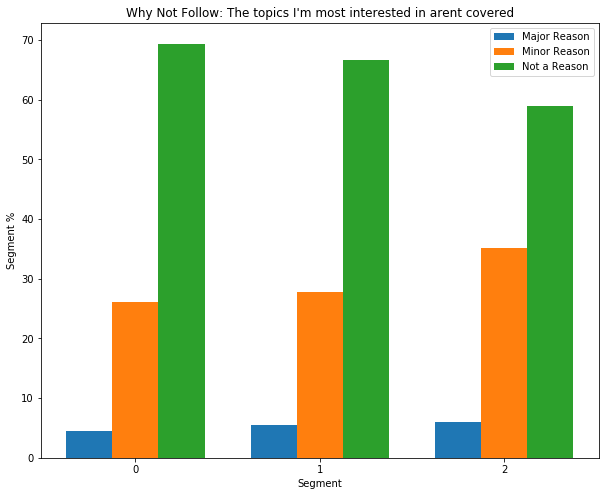

In [50]:
segments = np.asarray(segments)
a = dfg_3.loc['The science topics I\'m most interested in are not covered often is a major reason to not follow science news']
b = dfg_3.loc['The science topics I\'m most interested in are not covered often is a minor reason to not follow science news']
c = dfg_3.loc['The science topics I\'m most interested in are not covered often is not a reason to not follow science news']

bar_width = .25
fig, ax = plt.subplots(figsize = (10,8))
ax.bar(segments,  a,  bar_width, label = 'Major Reason')
ax.bar(segments + bar_width, b, bar_width, label = 'Minor Reason')
ax.bar(segments + 2*bar_width, c, bar_width, label = 'Not a Reason')

ax.set_title('Why Not Follow: The topics I\'m most interested in arent covered')
ax.set_xlabel('Segment')
ax.set_ylabel('Segment %')
ax.set_xticks(ticks = segments+2*bar_width/2)
ax.set_xticklabels(('0', '1', '2'))
ax.legend(loc = 'upper right')

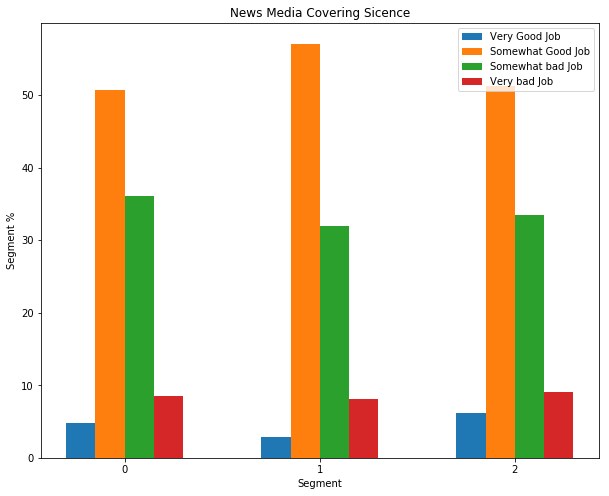

In [51]:
segments = np.asarray(segments)
a = dfg_3.loc['News media does a very good job in covering science']
b = dfg_3.loc['News media does a somewhat good job in covering science']
c = dfg_3.loc['News media does a somewhat bad job in covering science']
d = dfg_3.loc['News media does a very bad job in covering science']

bar_width = .15
fig, ax = plt.subplots(figsize = (10,8))
ax.bar(segments,  a,  bar_width, label = 'Very Good Job')
ax.bar(segments + bar_width, b, bar_width, label = 'Somewhat Good Job')
ax.bar(segments + 2*bar_width, c, bar_width, label = 'Somewhat bad Job')
ax.bar(segments + 3*bar_width, d, bar_width, label = 'Very bad Job')

ax.set_title('News Media Covering Sicence')
ax.set_xlabel('Segment')
ax.set_ylabel('Segment %')
ax.set_xticks(ticks = segments+3*bar_width/2)
ax.set_xticklabels(('0', '1', '2'))
ax.legend(loc = 'upper right')

## Plots by Segment

### Segment 0

In [52]:
seg_0 = dfg_3.loc[:,0]

#### Demographics

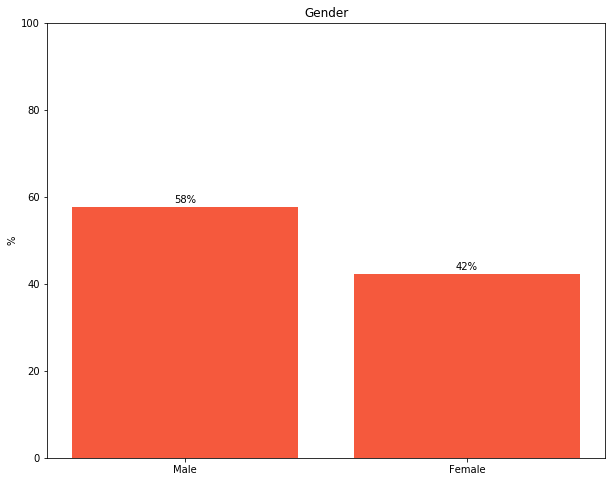

In [53]:
## Gender
fig, ax = plt.subplots(figsize = (10,8))
segments = ('Male', 'Female')
sizes = (seg_0['Male'], seg_0['Female'])
ax.bar(segments, height = sizes, color = '#f5593d')
ax.set_ylabel('%')
ax.set_title('Gender')
ax.set_ylim(bottom = 0, top = 100)
ax.set_xticks(ticks = (0.0, 1.0))
ax.set_xticklabels(('Male', 'Female'))

rects = ax.patches
# Make some labels
labels = ["{:2.0f}%".format(size) for size in sizes]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + .5, label,
            ha='center', va='bottom')
    
plt.savefig('static/img/segment0/demographics/seg0_gender.png')

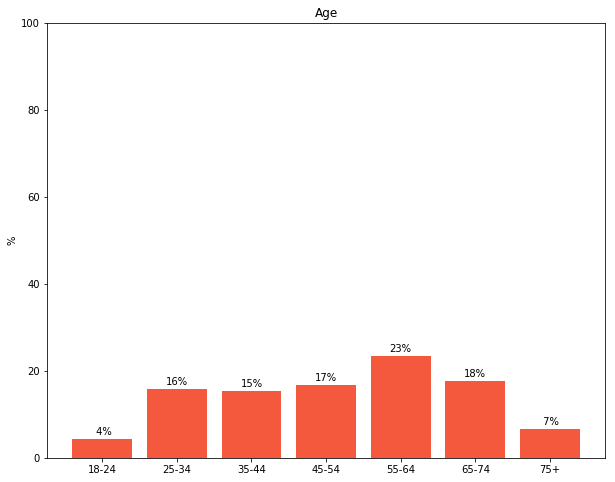

In [54]:
## Age
fig, ax = plt.subplots(figsize = (10,8))
segments = ('18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75+')
sizes = (seg_0['18-24 years old'], seg_0['25-34 years old'], seg_0['35-44 years old'], seg_0['45-54 years old'],
        seg_0['55-64 years old'], seg_0['65-74'], seg_0['75+'])
ax.bar(segments, height = sizes, color = '#f5593d')
ax.set_ylabel('%')
ax.set_title('Age')
ax.set_ylim(bottom = 0, top = 100)
ax.set_xticklabels(segments)

rects = ax.patches
# Make some labels
labels = ["{:2.0f}%".format(size) for size in sizes]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + .5, label,
            ha='center', va='bottom')
    
plt.savefig('static/img/segment0/demographics/seg0_age.png')

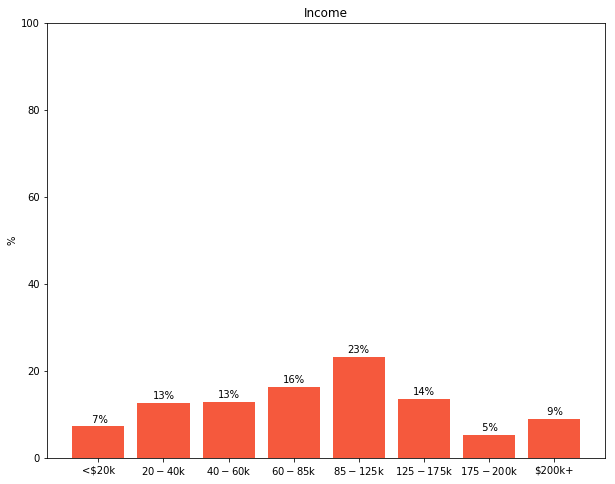

In [55]:
## Income
fig, ax = plt.subplots(figsize = (10,8))
segments = ('<$20k', '$20 - $40k', '$40 - $60k', '$60 - $85k', '$85 - $125k',
            '$125 - $175k', '$175 - $200k', '$200k+')
sizes = (seg_0['<$20,000'], seg_0['$20,000 - $40,000'], seg_0['$40,000 - $60,000'], seg_0['$60,000 - $85,000'],
        seg_0['$85,000 - $125,000'], seg_0['$125,000 - $175,000'], seg_0['$175,000 - $200,000'], seg_0['$200,000+'])
ax.bar(segments, height = sizes, color = '#f5593d')
ax.set_ylabel('%')
ax.set_title('Income')
ax.set_ylim(bottom = 0, top = 100)
ax.set_xticklabels(segments)

rects = ax.patches
# Make some labels
labels = ["{:2.0f}%".format(size) for size in sizes]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + .5, label,
            ha='center', va='bottom')
    
plt.savefig('static/img/segment0/demographics/seg0_income.png')

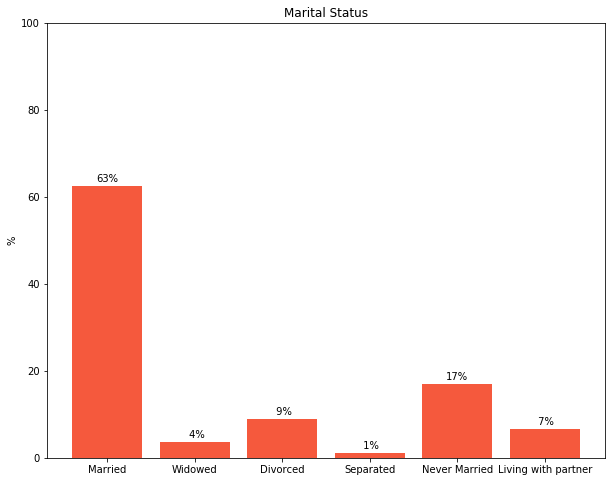

In [56]:
## Marital Status
fig, ax = plt.subplots(figsize = (10,8))
segments = ('Married', 'Widowed', 'Divorced', 'Separated', 'Never Married',
            'Living with partner')
sizes = (seg_0['Married'], seg_0['Widowed'], seg_0['Divorced'], seg_0['Separated'],
        seg_0['Never Married'], seg_0['Living with partner'])
ax.bar(segments, height = sizes, color = '#f5593d')
ax.set_ylabel('%')
ax.set_title('Marital Status')
ax.set_ylim(bottom = 0, top = 100)
ax.set_xticklabels(segments)

rects = ax.patches
# Make some labels
labels = ["{:2.0f}%".format(size) for size in sizes]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + .5, label,
            ha='center', va='bottom')
    
plt.savefig('static/img/segment0/demographics/seg0_maritalstatus.png')

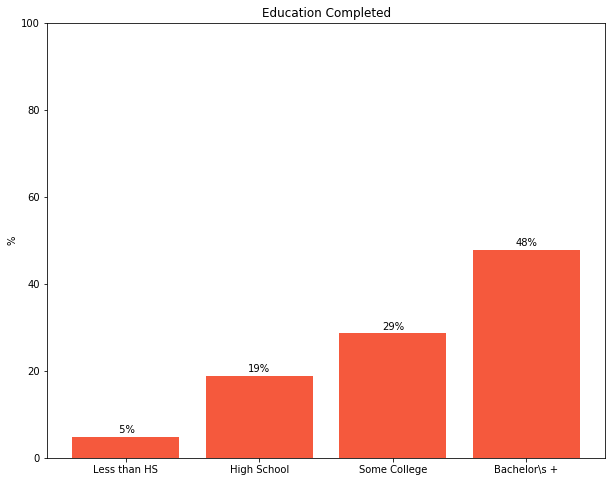

In [57]:
## Education
fig, ax = plt.subplots(figsize = (10,8))
segments = ('Less than HS', 'High School', 'Some College', 'Bachelor\s +')
sizes = (seg_0['Completed less than HS education'], seg_0['Completed HS education'], 
         seg_0['Completed some college education'], seg_0['Completed Bachelors degree or higher'])
ax.bar(segments, height = sizes, color = '#f5593d')
ax.set_ylabel('%')
ax.set_title('Education Completed')
ax.set_ylim(bottom = 0, top = 100)
ax.set_xticklabels(segments)

rects = ax.patches
# Make some labels
labels = ["{:2.0f}%".format(size) for size in sizes]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + .5, label,
            ha='center', va='bottom')
    
plt.savefig('static/img/segment0/demographics/seg0_education.png')

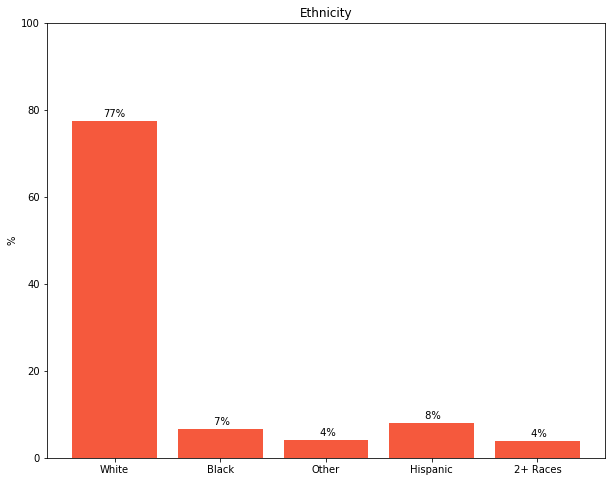

In [58]:
## Ethnicity

fig, ax = plt.subplots(figsize = (10,8))
segments = ('White', 'Black', 'Other', 'Hispanic', '2+ Races')
sizes = (seg_0['White, non-hispanic'], seg_0['Black, non-hispanic'], 
         seg_0['Other, non-hispanic'], seg_0['Hispanic'],
         seg_0['2+ races, non-hispanic'])
ax.bar(segments, height = sizes, color = '#f5593d')
ax.set_ylabel('%')
ax.set_title('Ethnicity')
ax.set_ylim(bottom = 0, top = 100)
ax.set_xticklabels(segments)

rects = ax.patches
# Make some labels
labels = ["{:2.0f}%".format(size) for size in sizes]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + .5, label,
            ha='center', va='bottom')
    
plt.savefig('static/img/segment0/demographics/seg0_ethnicity.png')

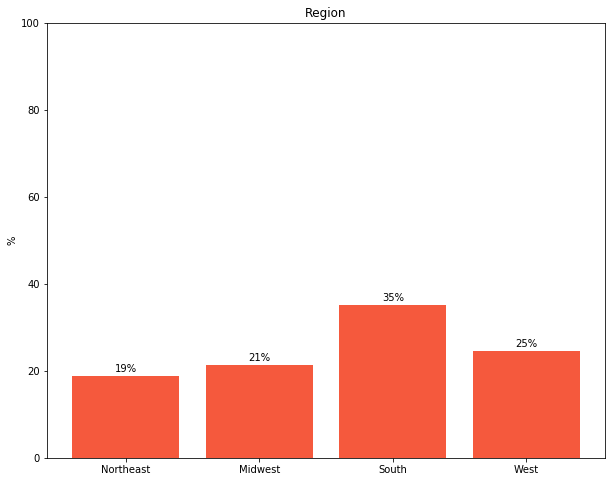

In [59]:
## Region
fig, ax = plt.subplots(figsize = (10,8))
segments = ('Northeast', 'Midwest', 'South', 'West')
sizes = (seg_0['Northeast Region'], seg_0['Midwest Region'], 
         seg_0['South Region'], seg_0['West Region'])
ax.bar(segments, height = sizes, color = '#f5593d')
ax.set_ylabel('%')
ax.set_title('Region')
ax.set_ylim(bottom = 0, top = 100)
ax.set_xticklabels(segments)

rects = ax.patches
# Make some labels
labels = ["{:2.0f}%".format(size) for size in sizes]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + .5, label,
            ha='center', va='bottom')
    
plt.savefig('static/img/segment0/demographics/seg0_region.png')

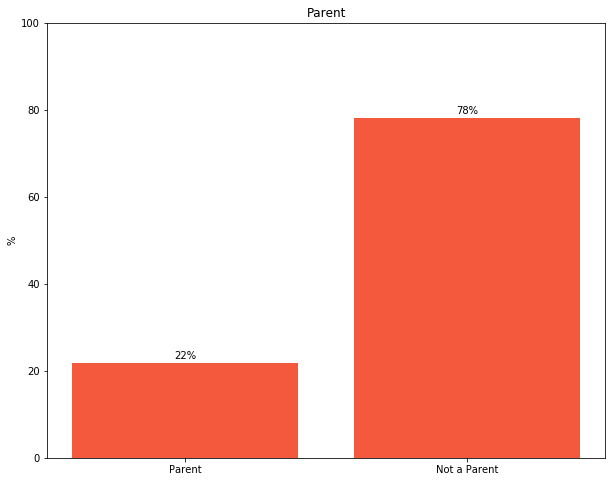

In [60]:
## Parent
fig, ax = plt.subplots(figsize = (10,8))
segments = ('Parent', 'Not a Parent')
sizes = (seg_0['I am the parent of a 0-17 year old'], seg_0['I am not the parent of a 0-17 year old'])
ax.bar(segments, height = sizes, color = '#f5593d')
ax.set_ylabel('%')
ax.set_title('Parent')
ax.set_ylim(bottom = 0, top = 100)
ax.set_xticklabels(segments)

rects = ax.patches
# Make some labels
labels = ["{:2.0f}%".format(size) for size in sizes]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + .5, label,
            ha='center', va='bottom')
    
plt.savefig('static/img/segment0/demographics/seg0_parent.png')

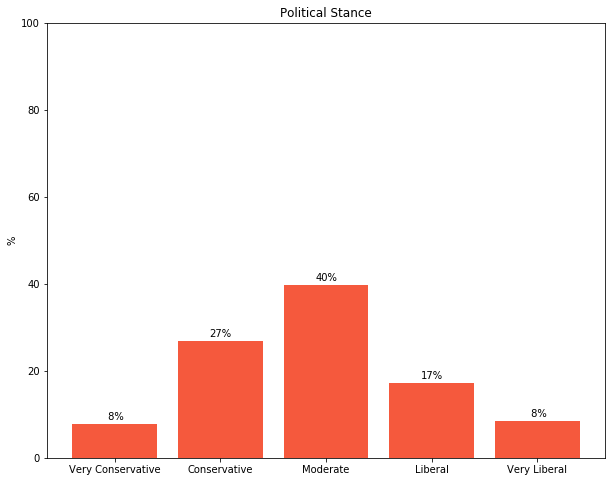

In [61]:
## Political Views
fig, ax = plt.subplots(figsize = (10,8))
segments = ('Very Conservative', 'Conservative', 'Moderate', 'Liberal', 'Very Liberal')
sizes = (seg_0['My political views are Very Conservative'], seg_0['My political views are Conservative'],
        seg_0['My political views are Moderate'], seg_0['My political views are Liberal'],
        seg_0['My political views are Very Liberal'])
ax.bar(segments, height = sizes, color = '#f5593d')
ax.set_ylabel('%')
ax.set_title('Political Stance')
ax.set_ylim(bottom = 0, top = 100)
ax.set_xticklabels(segments)

rects = ax.patches
# Make some labels
labels = ["{:2.0f}%".format(size) for size in sizes]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + .5, label,
            ha='center', va='bottom')
    
plt.savefig('static/img/segment0/demographics/seg0_politicalviews.png')

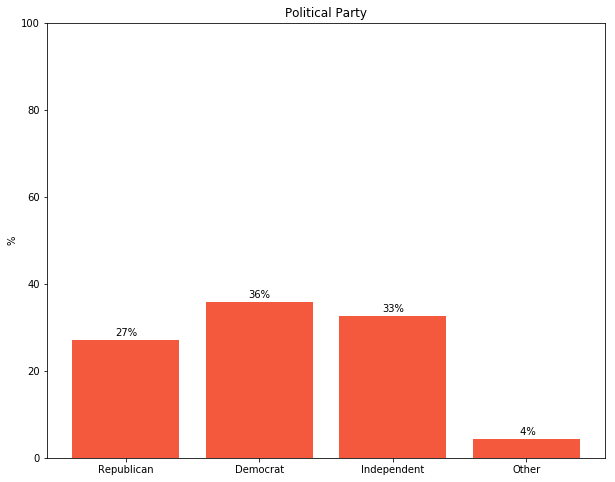

In [62]:
## Political Party
fig, ax = plt.subplots(figsize = (10,8))
segments = ('Republican', 'Democrat', 'Independent', 'Other')
sizes = (seg_0['I consider myself a Republican'], seg_0['I consider myself a Democrat'],
        seg_0['I consider myself an Independent'], seg_0['I consider myself a different party'])
ax.bar(segments, height = sizes, color = '#f5593d')
ax.set_ylabel('%')
ax.set_title('Political Party')
ax.set_ylim(bottom = 0, top = 100)
ax.set_xticklabels(segments)

rects = ax.patches
# Make some labels
labels = ["{:2.0f}%".format(size) for size in sizes]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + .5, label,
            ha='center', va='bottom')
    
plt.savefig('static/img/segment0/demographics/seg0_politicalparty.png')

#### Science News

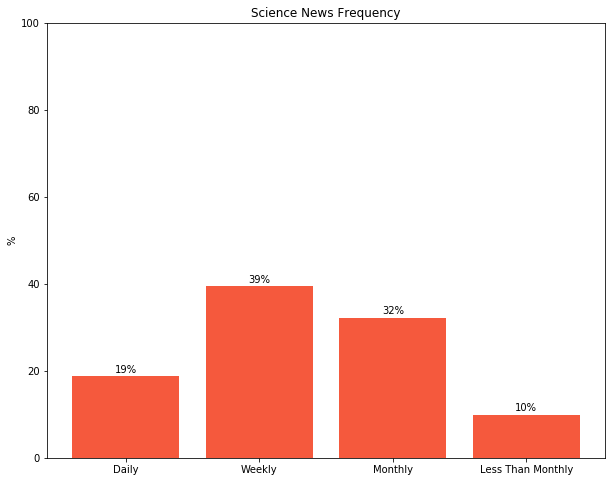

In [63]:
## Frequency
fig, ax = plt.subplots(figsize = (10,8))
segments = ('Daily', 'Weekly', 'Monthly', 'Less Than Monthly')
sizes = (seg_0['I read, watch or listen to science news nearly every day'], seg_0['I read, watch or listen to science news a few times a week'],
        seg_0['I read, watch or listen to science news a few times a month'], seg_0['I read, watch or listen to science news less often than a few times a month'])
ax.bar(segments, height = sizes, color = '#f5593d')
ax.set_ylabel('%')
ax.set_title('Science News Frequency')
ax.set_ylim(bottom = 0, top = 100)
ax.set_xticklabels(segments)

rects = ax.patches
# Make some labels
labels = ["{:2.0f}%".format(size) for size in sizes]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + .5, label,
            ha='center', va='bottom')
    
plt.savefig('static/img/segment0/scinews/seg0_frequency.png')


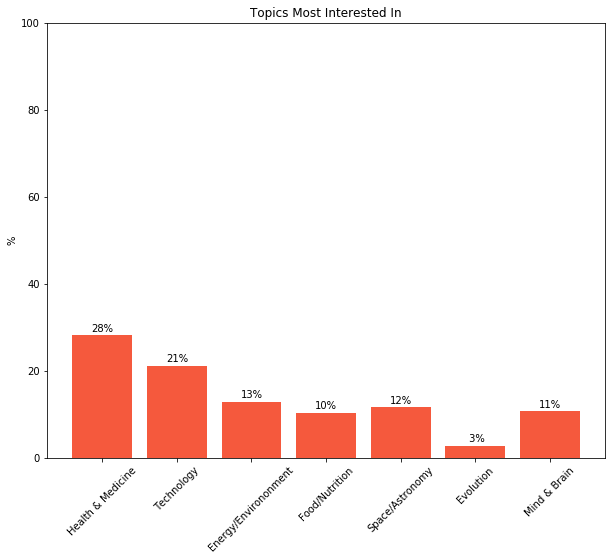

In [65]:
## Topics
fig, ax = plt.subplots(figsize = (10,8))
segments = ('Health & Medicine', 'Technology', 'Energy/Environonment', 'Food/Nutrition', 'Space/Astronomy',
           'Evolution', 'Mind & Brain')
sizes = (seg_0['Most interested in health & medicine'], seg_0['Most interested in technology'],
        seg_0['Most interested in energy and environment'], seg_0['Most interested in food and nutrition'],
        seg_0['Most interested in space and astronomy'], seg_0['Most interested in evolution of human & animals'],
         seg_0['Most interested in the mind and brain'])
ax.bar(segments, height = sizes, color = '#f5593d')
ax.set_ylabel('%')
ax.set_title('Topics Most Interested In')
ax.set_ylim(bottom = 0, top = 100)
ax.set_xticklabels(segments, {'rotation': 45})

rects = ax.patches
# Make some labels
labels = ["{:2.0f}%".format(size) for size in sizes]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + .5, label,
            ha='center', va='bottom')
    
plt.savefig('static/img/segment0/scinews/seg0_topics.png')


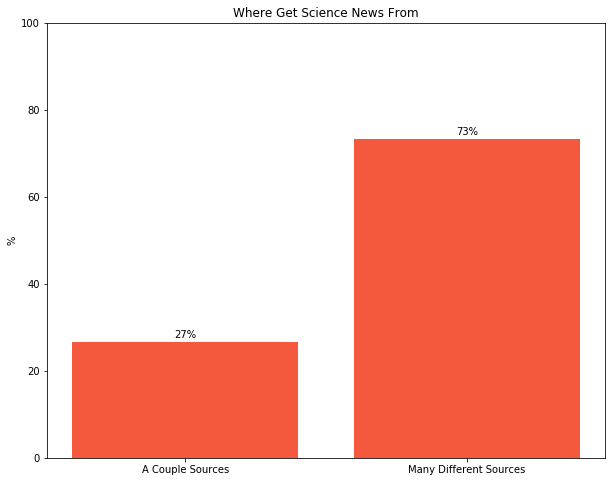

In [66]:
## Where get
fig, ax = plt.subplots(figsize = (10,8))
segments = ('A Couple Sources', 'Many Different Sources')
sizes = (seg_0['Get science news from a couple sources'], seg_0['Get science news from many different sources'])
ax.bar(segments, height = sizes, color = '#f5593d')
ax.set_ylabel('%')
ax.set_title('Where Get Science News From')
ax.set_ylim(bottom = 0, top = 100)
ax.set_xticklabels(segments)

rects = ax.patches
# Make some labels
labels = ["{:2.0f}%".format(size) for size in sizes]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + .5, label,
            ha='center', va='bottom')
    
plt.savefig('static/img/segment0/scinews/seg0_whereget.png')


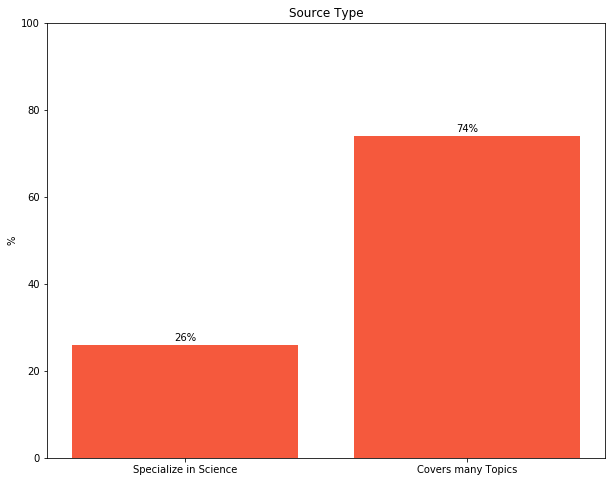

In [67]:
## Source Type
fig, ax = plt.subplots(figsize = (10,8))
segments = ('Specialize in Science', 'Covers many Topics')
sizes = (seg_0['Get science news from sources that specialize in science topics'], 
         seg_0['Get science news sources that cover all sorts of topics'])
ax.bar(segments, height = sizes, color = '#f5593d')
ax.set_ylabel('%')
ax.set_title('Source Type')
ax.set_ylim(bottom = 0, top = 100)
ax.set_xticklabels(segments)

rects = ax.patches
# Make some labels
labels = ["{:2.0f}%".format(size) for size in sizes]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + .5, label,
            ha='center', va='bottom')
    
plt.savefig('static/img/segment0/scinews/seg0_sourcetype.png')


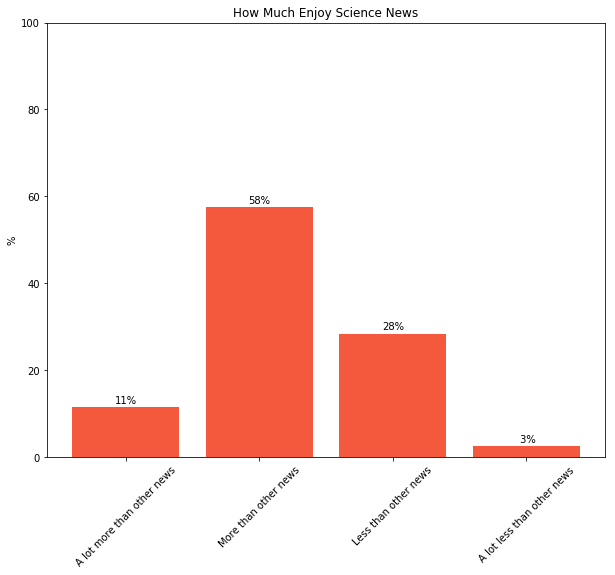

In [68]:
## Enjoy
fig, ax = plt.subplots(figsize = (10,8))
segments = ('A lot more than other news', 'More than other news', 'Less than other news', 'A lot less than other news')
sizes = (seg_0['Enjoy science news a lot more than other news'], 
         seg_0['Enjoy science news more than other news'],
         seg_0['Enjoy science news less than other news'],
         seg_0['Enjoy science news a lot less than other news'])
ax.bar(segments, height = sizes, color = '#f5593d')
ax.set_ylabel('%')
ax.set_title('How Much Enjoy Science News')
ax.set_ylim(bottom = 0, top = 100)
ax.set_xticklabels(segments, {'rotation': 45})

rects = ax.patches
# Make some labels
labels = ["{:2.0f}%".format(size) for size in sizes]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + .5, label,
            ha='center', va='bottom')
    
plt.savefig('static/img/segment0/scinews/seg0_enjoy.png')


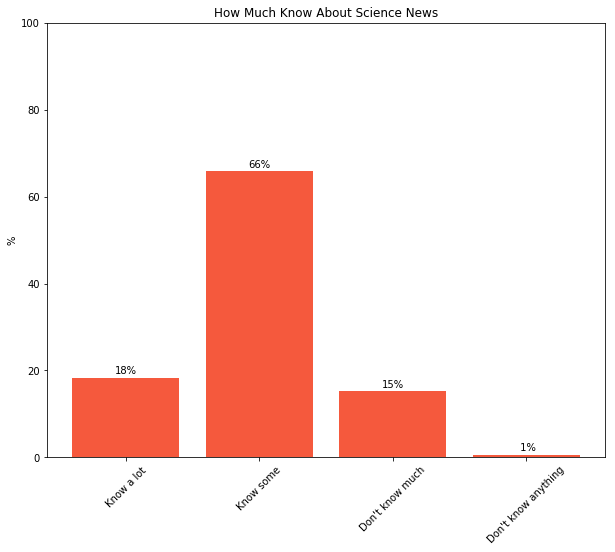

In [69]:
## Topics
fig, ax = plt.subplots(figsize = (10,8))
segments = ('Know a lot', 'Know some', 'Don\'t know much', 'Don\'t know anything')
sizes = (seg_0['I know a lot about science'], 
         seg_0['I know some about science'],
         seg_0['I know not much about science'],
         seg_0['I know nothing at all about science'])
ax.bar(segments, height = sizes, color = '#f5593d')
ax.set_ylabel('%')
ax.set_title('How Much Know About Science News')
ax.set_ylim(bottom = 0, top = 100)
ax.set_xticklabels(segments, {'rotation': 45})

rects = ax.patches
# Make some labels
labels = ["{:2.0f}%".format(size) for size in sizes]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + .5, label,
            ha='center', va='bottom')
    
plt.savefig('static/img/segment0/scinews/seg0_know.png')


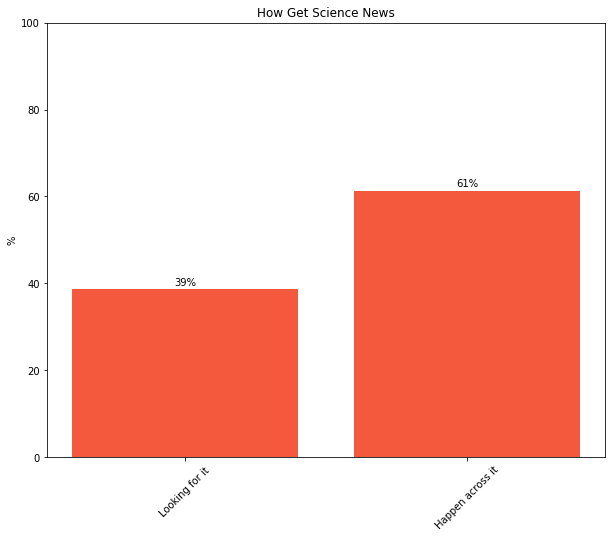

In [70]:
## How Get Science News
fig, ax = plt.subplots(figsize = (10,8))
segments = ('Looking for it', 'Happen across it')
sizes = (seg_0['I mostly get science news because I\'m looking for it'], 
         seg_0['I mostly get science news because I happen to come across it'])
ax.bar(segments, height = sizes, color = '#f5593d')
ax.set_ylabel('%')
ax.set_title('How Get Science News')
ax.set_ylim(bottom = 0, top = 100)
ax.set_xticklabels(segments, {'rotation': 45})

rects = ax.patches
# Make some labels
labels = ["{:2.0f}%".format(size) for size in sizes]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + .5, label,
            ha='center', va='bottom')
    
plt.savefig('static/img/segment0/scinews/seg0_getnews.png')


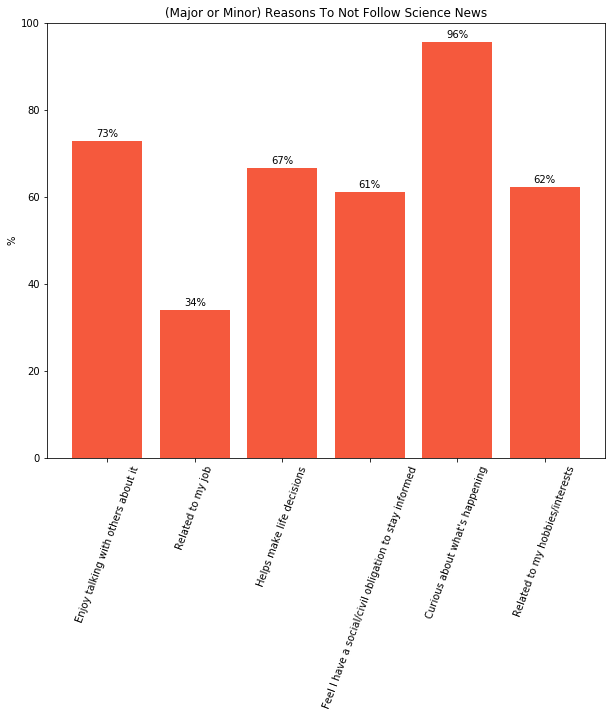

In [71]:
## Reasons Why Follow
fig, ax = plt.subplots(figsize = (10,8))
segments = ('Enjoy talking with others about it', 'Related to my job', 'Helps make life decisions',
           'Feel I have a social/civil obligation to stay informed', 'Curious about what\'s happening',
           'Related to my hobbies/interests')
sizes = (100-seg_0['Enjoy talking with others about what\'s happening in science is not a reason to follow science news'],
         100-seg_0['It is related to things I need to know for my job is not a reason to follow science news'],
         100-seg_0['Helps me make decision about every day life is not a reason to follow science news'],
         100-seg_0['I feel I have a social or civil obligation to stay informed is not a reason to follow science news'],
         100-seg_0['I am curious about what\'s happening in science is not a reason to follow science news'],
         100-seg_0['It is related to my activities, hobbies or interests is not a reason to follow science news'])
ax.bar(segments, height = sizes, color = '#f5593d')
ax.set_ylabel('%')
ax.set_title('(Major or Minor) Reasons To Not Follow Science News')
ax.set_ylim(bottom = 0, top = 100)
ax.set_xticklabels(segments, {'rotation': 70})

rects = ax.patches
# Make some labels
labels = ["{:2.0f}%".format(size) for size in sizes]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + .5, label,
            ha='center', va='bottom')
    
plt.savefig('static/img/segment0/scinews/seg0_why.png')


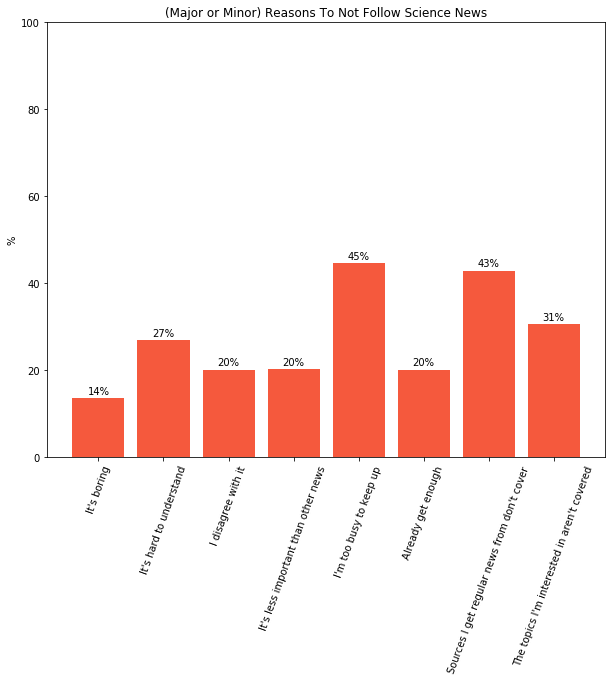

In [72]:
## Reasons Why Not Follow
fig, ax = plt.subplots(figsize = (10,8))
segments = ('It\'s boring', 'It\'s hard to understand', 'I disagree with it',
            'It\'s less important than other news', 'I\'m too busy to keep up',
            'Already get enough', 'Sources I get regular news from don\'t cover',
           'The topics I\'m interested in aren\'t covered')
sizes = (100-seg_0['Science news is boring is not a reason to not follow science news'],
         100-seg_0['Science news is hard to understand is not a reason to not follow science news'],
         100-seg_0['I often disagree with science news is not a reason to not follow science news'],
         100-seg_0['Science news is less important than other topics is not a reason to not follow science news'],
         100-seg_0['I am too busy to keep up with science news more often is not a reason to not follow science news'],
         100-seg_0['I already get enough science news is not a reason to not follow science news'],
         100-seg_0['The sources I regulary get news from don\'t cover a lot of science is not a reason to not follow science news'],
         100-seg_0['The science topics I\'m most interested in are not covered often is not a reason to not follow science news'],
        )
ax.bar(segments, height = sizes, color = '#f5593d')
ax.set_ylabel('%')
ax.set_title('(Major or Minor) Reasons To Not Follow Science News')
ax.set_ylim(bottom = 0, top = 100)
ax.set_xticklabels(segments, {'rotation': 70})

rects = ax.patches
# Make some labels
labels = ["{:2.0f}%".format(size) for size in sizes]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + .5, label,
            ha='center', va='bottom')
    
plt.savefig('static/img/segment0/scinews/seg0_whynot.png')


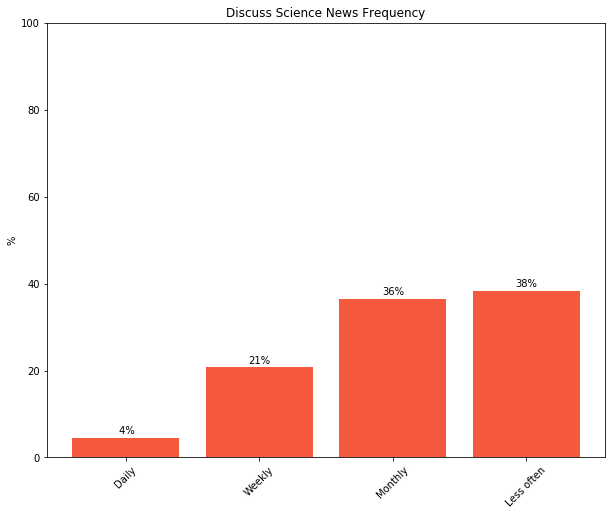

In [73]:
## Discuss Frequency
fig, ax = plt.subplots(figsize = (10,8))
segments = ('Daily', 'Weekly', 'Monthly', 'Less often')
sizes = (seg_0['I discuss science news with others nearly every day'], 
         seg_0['I discuss science news with others a few times a week'],
         seg_0['I discuss science news with others a few times a month'],
         seg_0['I discuss science news with others less often than few times a month'])
ax.bar(segments, height = sizes, color = '#f5593d')
ax.set_ylabel('%')
ax.set_title('Discuss Science News Frequency')
ax.set_ylim(bottom = 0, top = 100)
ax.set_xticklabels(segments, {'rotation': 45})

rects = ax.patches
# Make some labels
labels = ["{:2.0f}%".format(size) for size in sizes]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + .5, label,
            ha='center', va='bottom')
    
plt.savefig('static/img/segment0/scinews/seg0_discuss.png')


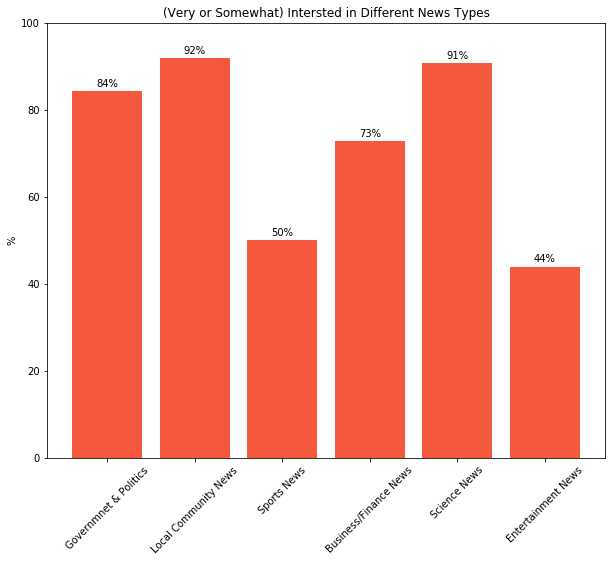

In [74]:
## News Types
fig, ax = plt.subplots(figsize = (10,8))
segments = ('Governmnet & Politics', 'Local Community News', 'Sports News', 'Business/Finance News', 
            'Science News', 'Entertainment News')
sizes = (seg_0['Interested in government and politics news'], 
         seg_0['Interested in local community news'],
         seg_0['Interested in sports news'],
         seg_0['Interested in business and finance news'],
         seg_0['Interested in science news'],
         seg_0['Interested in entertainment news'])
ax.bar(segments, height = sizes, color = '#f5593d')
ax.set_ylabel('%')
ax.set_title('(Very or Somewhat) Intersted in Different News Types')
ax.set_ylim(bottom = 0, top = 100)
ax.set_xticklabels(segments, {'rotation': 45})

rects = ax.patches
# Make some labels
labels = ["{:2.0f}%".format(size) for size in sizes]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + .5, label,
            ha='center', va='bottom')
    
plt.savefig('static/img/segment0/scinews/seg0_newstypes.png')


#### General News

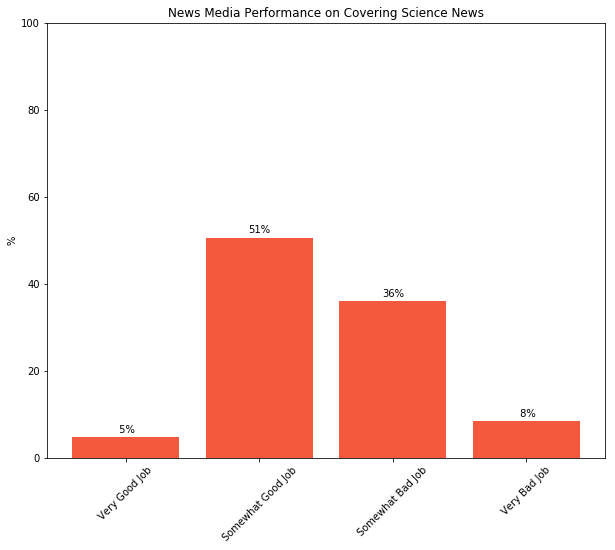

In [75]:
## News Types
fig, ax = plt.subplots(figsize = (10,8))
segments = ('Very Good Job', 'Somewhat Good Job', 'Somewhat Bad Job', 'Very Bad Job')
sizes = (seg_0['News media does a very good job in covering science'], 
         seg_0['News media does a somewhat good job in covering science'],
         seg_0['News media does a somewhat bad job in covering science'],
         seg_0['News media does a very bad job in covering science'])
ax.bar(segments, height = sizes, color = '#f5593d')
ax.set_ylabel('%')
ax.set_title('News Media Performance on Covering Science News')
ax.set_ylim(bottom = 0, top = 100)
ax.set_xticklabels(segments, {'rotation': 45})

rects = ax.patches
# Make some labels
labels = ["{:2.0f}%".format(size) for size in sizes]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + .5, label,
            ha='center', va='bottom')
    
plt.savefig('static/img/segment0/gennews/seg0_newsjob.png')


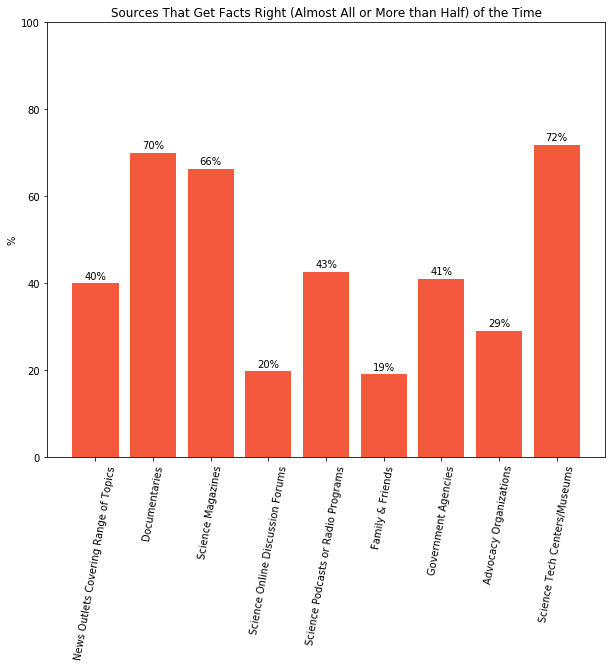

In [76]:
## News Types
fig, ax = plt.subplots(figsize = (10,8))
segments = ('News Outlets Covering Range of Topics',
            'Documentaries',
            'Science Magazines', 
            'Science Online Discussion Forums',
            'Science Podcasts or Radio Programs', 
            'Family & Friends',
            'Government Agencies',
            'Advocacy Organizations',
            'Science Tech Centers/Museums')

sizes = (seg_0['News outlets that cover a range of topics get the facts right almost all or more than half of the time'], 
         seg_0['Documentaries or other science video programs get the facts right almost all or more than half of the time'],
         seg_0['Science magazines (print/online) get the facts right almost all or more than half of the time'],
         seg_0['Online discussion forums about science get the facts right almost all or more than half of the time'],
         seg_0['Science podcasts or radio programs get the facts right almost all or more than half of the time'],
         seg_0['Family, friends & acquaintances get the facts right almost all or more than half of the time'],
         seg_0['Government agencies get the facts right almost all or more than half of the time'],
         seg_0['Advocacy organizations get the facts right almost all or more than half of the time'],
         seg_0['Science technology centers or museums get the facts right almost all or more than half of the time'])

ax.bar(segments, height = sizes, color = '#f5593d')
ax.set_ylabel('%')
ax.set_title('Sources That Get Facts Right (Almost All or More than Half) of the Time')
ax.set_ylim(bottom = 0, top = 100)
ax.set_xticklabels(segments, {'rotation': 80})

rects = ax.patches
# Make some labels
labels = ["{:2.0f}%".format(size) for size in sizes]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + .5, label,
            ha='center', va='bottom')
    
plt.savefig('static/img/segment0/gennews/seg0_sourcesright.png')


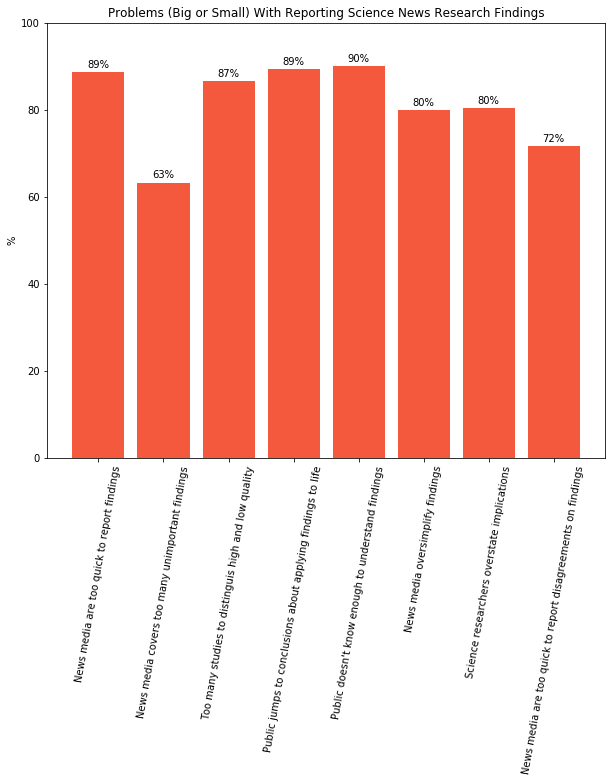

In [77]:
## News Types
fig, ax = plt.subplots(figsize = (10,8))
segments = ('News media are too quick to report findings',
            'News media covers too many unimportant findings',
            'Too many studies to distinguis high and low quality', 
            'Public jumps to conclusions about applying findings to life',
            'Public doesn\'t know enough to understand findings', 
            'News media oversimplify findings',
            'Science researchers overstate implications',
            'News media are too quick to report disagreements on findings')

sizes = (100 - seg_0['The news media are too quick to report research findings that may not hold up is not a problem'], 
         100 - seg_0['The news media cover too many research findings that are not really important is not a problem'],
         100 - seg_0['There are so many research studies it\'s hard to distinguish between high and low quality is not a problem'],
         100 - seg_0['The public jumps to conclusions about how to apply new research findings to their lives is not a problem'],
         100 - seg_0['The public doesn\'t know enough about science to really understand research findings covered in news is not a problem'],
         100 - seg_0['The news media oversimplifies scientific research findings is not a problem'],
         100 - seg_0['Science researchers overstate the implications of their findings is not a problem'],
         100 - seg_0['The news media are too quick to report on disagreement about research findings is not a problem'])

ax.bar(segments, height = sizes, color = '#f5593d')
ax.set_ylabel('%')
ax.set_title('Problems (Big or Small) With Reporting Science News Research Findings')
ax.set_ylim(bottom = 0, top = 100)
ax.set_xticklabels(segments, {'rotation': 80})

rects = ax.patches
# Make some labels
labels = ["{:2.0f}%".format(size) for size in sizes]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + .5, label,
            ha='center', va='bottom')
    
plt.savefig('static/img/segment0/gennews/seg0_problems.png')


#### Other

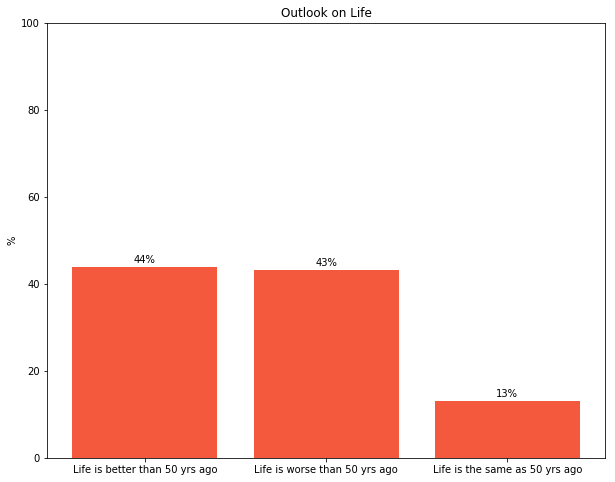

In [78]:
## News Types
fig, ax = plt.subplots(figsize = (10,8))
segments = ('Life is better than 50 yrs ago',
            'Life is worse than 50 yrs ago',
            'Life is the same as 50 yrs ago')

sizes = (seg_0['Life is better than 50 yrs ago'], 
         seg_0['Life is worse than 50 yrs ago'],
         seg_0['Life is the same as 50 yrs ago'])
         
ax.bar(segments, height = sizes, color = '#f5593d')
ax.set_ylabel('%')
ax.set_title('Outlook on Life')
ax.set_ylim(bottom = 0, top = 100)
ax.set_xticklabels(segments)

rects = ax.patches
# Make some labels
labels = ["{:2.0f}%".format(size) for size in sizes]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + .5, label,
            ha='center', va='bottom')
    
plt.savefig('static/img/segment0/behavior/seg0_life.png')


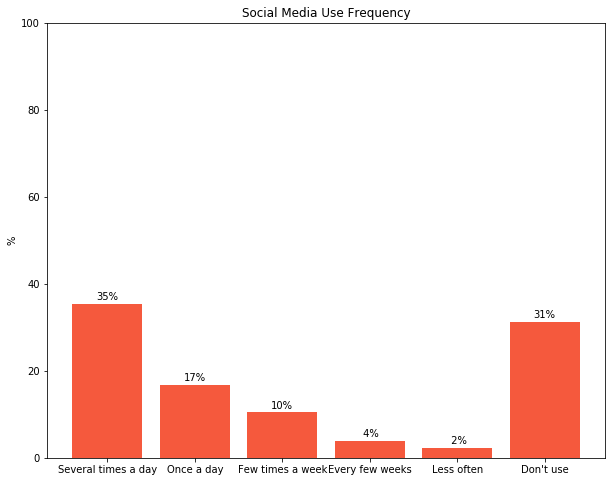

In [79]:
## News Types
fig, ax = plt.subplots(figsize = (10,8))
segments = ('Several times a day',
            'Once a day',
            'Few times a week',
            'Every few weeks',
            'Less often',
            'Don\'t use')

sizes = (seg_0['Use social media several times a day'], 
         seg_0['Use social media about once a day'],
         seg_0['Use social media a few times a week'],
         seg_0['Use social every few weeks'],
         seg_0['Use social media less often than every few weeks'],
         seg_0['SNSFREQ: Not Asked'])
         
ax.bar(segments, height = sizes, color = '#f5593d')
ax.set_ylabel('%')
ax.set_title('Social Media Use Frequency')
ax.set_ylim(bottom = 0, top = 100)
ax.set_xticklabels(segments)

rects = ax.patches
# Make some labels
labels = ["{:2.0f}%".format(size) for size in sizes]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + .5, label,
            ha='center', va='bottom')
    
plt.savefig('static/img/segment0/behavior/seg0_socialmediafreq.png')


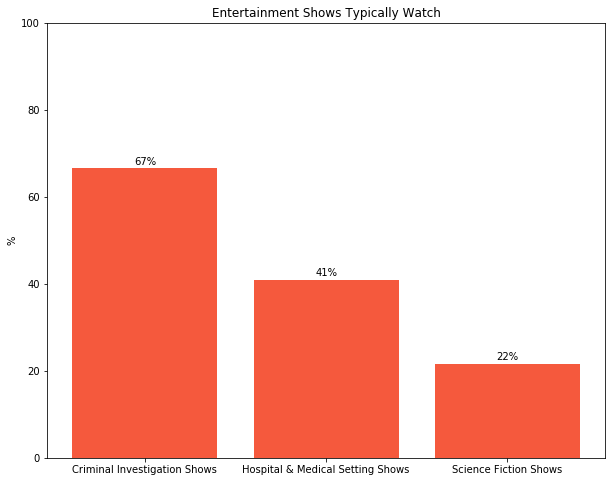

In [81]:
## Show Types Watch
fig, ax = plt.subplots(figsize = (10,8))
segments = ('Criminal Investigation Shows',
            'Hospital & Medical Setting Shows',
            'Science Fiction Shows')

sizes = (seg_0['I typically watch entertainment programs on CRIMINAL INVESTIGATIONS'], 
         seg_0['I typically watch entertainment programs on HOSPITALS AND MEDICAL SETTINGS'],
         seg_0['I often watch entertainment programs on SCIENCE FICTION'])
         
ax.bar(segments, height = sizes, color = '#f5593d')
ax.set_ylabel('%')
ax.set_title('Entertainment Shows Typically Watch')
ax.set_ylim(bottom = 0, top = 100)
ax.set_xticklabels(segments)

rects = ax.patches
# Make some labels
labels = ["{:2.0f}%".format(size) for size in sizes]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + .5, label,
            ha='center', va='bottom')
    
plt.savefig('static/img/segment0/behavior/seg0_entshows.png')


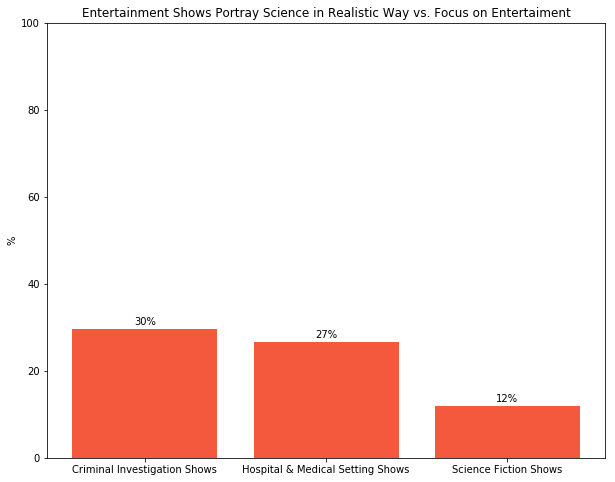

In [83]:
## Show Types Watch
fig, ax = plt.subplots(figsize = (10,8))
segments = ('Criminal Investigation Shows',
            'Hospital & Medical Setting Shows',
            'Science Fiction Shows')

sizes = (seg_0['CRIMINAL INVESTIGATION shows generally portray science, tech & medicine in a realistic way'], 
         seg_0['HOSPITALS AND MEDICAL SETTINGS shows generally portray science, tech & medicine in a realistic way'],
         seg_0['SCIENCE FICTION shows generally portray science, tech & medicine in a realistic way'])
         
ax.bar(segments, height = sizes, color = '#f5593d')
ax.set_ylabel('%')
ax.set_title('Entertainment Shows Portray Science in Realistic Way vs. Focus on Entertaiment')
ax.set_ylim(bottom = 0, top = 100)
ax.set_xticklabels(segments)

rects = ax.patches
# Make some labels
labels = ["{:2.0f}%".format(size) for size in sizes]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + .5, label,
            ha='center', va='bottom')
    
plt.savefig('static/img/segment0/behavior/seg0_entshowsportray.png')


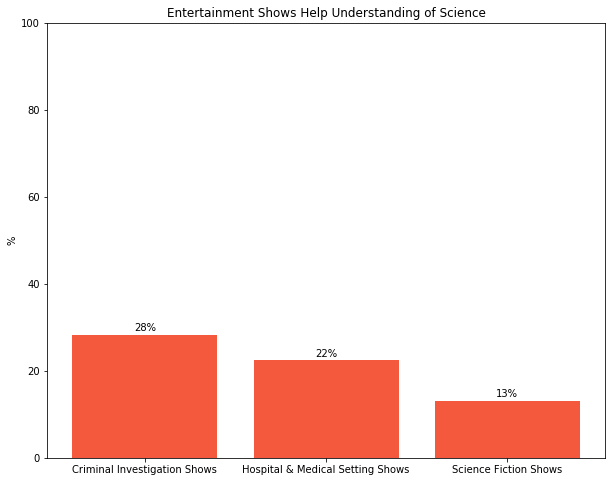

In [84]:
## Show Types Watch
fig, ax = plt.subplots(figsize = (10,8))
segments = ('Criminal Investigation Shows',
            'Hospital & Medical Setting Shows',
            'Science Fiction Shows')

sizes = (seg_0['Watching CRIMINAL INVESTIGATION shows helps my understanding of science, tech & medicine'], 
         seg_0['Watching HOSPITALS AND MEDICAL SETTINGS shows helps my understanding of science, tech & medicine'],
         seg_0['Watching SCIENCE FICTION shows helps my understanding of science, tech & medicine'])
         
ax.bar(segments, height = sizes, color = '#f5593d')
ax.set_ylabel('%')
ax.set_title('Entertainment Shows Help Understanding of Science')
ax.set_ylim(bottom = 0, top = 100)
ax.set_xticklabels(segments)

rects = ax.patches
# Make some labels
labels = ["{:2.0f}%".format(size) for size in sizes]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + .5, label,
            ha='center', va='bottom')
    
plt.savefig('static/img/segment0/behavior/seg0_entshowsunderstand.png')


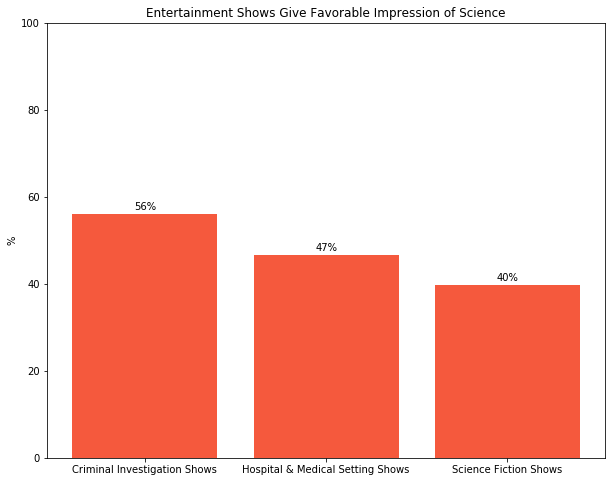

In [85]:
## Show Types Watch
fig, ax = plt.subplots(figsize = (10,8))
segments = ('Criminal Investigation Shows',
            'Hospital & Medical Setting Shows',
            'Science Fiction Shows')

sizes = (seg_0['CRIMINAL INVESTIGATION shows give a favorable impression of working in science, tech & medicine'], 
         seg_0['HOSPITALS AND MEDICAL SETTINGS shows give a favorable impression of working in science, tech & medicine'],
         seg_0['SCIENCE FICTION shows give a favorable impression of working in science, tech & medicine'])
         
ax.bar(segments, height = sizes, color = '#f5593d')
ax.set_ylabel('%')
ax.set_title('Entertainment Shows Give Favorable Impression of Science')
ax.set_ylim(bottom = 0, top = 100)
ax.set_xticklabels(segments)

rects = ax.patches
# Make some labels
labels = ["{:2.0f}%".format(size) for size in sizes]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + .5, label,
            ha='center', va='bottom')
    
plt.savefig('static/img/segment0/behavior/seg0_entshowsimpress.png')


### Segment 1

In [ ]:
seg_1 = dfg_3.loc[:,1]